# Data Gathering, Cleaning, and Exploration

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from scipy import stats
#Install cursor dependencies
import  mplcursors
%matplotlib nbagg

# Census API Key and config
from config import api_key
c = Census(api_key, year=2018)

# Dictionary of state abbreviations
from us_state_abbrev import us_state_abbrev

## Census Data

In [2]:
# Make API calls
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E"), {'for': 'county:*'})
# CHECK FOR YEAR (2018?)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering/Renaming
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "NAME": "Name", "county": "County"})




In [3]:
census = census_pd[["County", "Name", "Population", "Median Age", "Household Income", ]].copy()
census

County                     Name  Population  Median Age  Household Income
0       173  Sedgwick County, Kansas    512064.0        35.2           54974.0
1       157  Republic County, Kansas      4686.0        51.1           48022.0
2       065    Graham County, Kansas      2545.0        51.9           40769.0
3       045   Douglas County, Kansas    119319.0        29.5           55832.0
4       179  Sheridan County, Kansas      2506.0        44.3           56071.0
...     ...                      ...         ...         ...               ...
3215    003      Adams County, Idaho      4019.0        54.2           45319.0
3216    053     Jerome County, Idaho     23431.0        32.7           49306.0
3217    061      Lewis County, Idaho      3845.0        48.3           41326.0
3218    073     Owyhee County, Idaho     11455.0        38.4           40430.0
3219    021   Boundary County, Idaho     11549.0        43.5           43507.0

[3220 rows x 5 columns]

In [4]:
# Final DataFrame

# Copy and save to csv
census = census_pd[["County", "Name", "Population", "Median Age", "Household Income"]].copy()
census.to_csv("resources/census_data.csv", encoding="utf-8", index=False)

# Combine county name with state for later merging
census['county'] = census['Name'].str.replace(' County', '').str.replace(' Parish', '')
census.drop(['County', 'Name'], axis=1, inplace=True)
census.set_index('county', inplace=True)
census

Population  Median Age  Household Income
county                                                    
Sedgwick, Kansas    512064.0        35.2           54974.0
Republic, Kansas      4686.0        51.1           48022.0
Graham, Kansas        2545.0        51.9           40769.0
Douglas, Kansas     119319.0        29.5           55832.0
Sheridan, Kansas      2506.0        44.3           56071.0
...                      ...         ...               ...
Adams, Idaho          4019.0        54.2           45319.0
Jerome, Idaho        23431.0        32.7           49306.0
Lewis, Idaho          3845.0        48.3           41326.0
Owyhee, Idaho        11455.0        38.4           40430.0
Boundary, Idaho      11549.0        43.5           43507.0

[3220 rows x 3 columns]

In [5]:
# Summary stats
census.describe()

Population   Median Age  Household Income
count  3.220000e+03  3220.000000       3219.000000
mean   1.013323e+05    41.277516      50791.797763
std    3.260964e+05     5.356761      14455.719850
min    7.500000e+01    21.700000      12812.000000
25%    1.121425e+04    38.100000      41904.000000
50%    2.595050e+04    41.200000      49514.000000
75%    6.655225e+04    44.300000      57348.000000
max    1.009805e+07    67.000000     136268.000000

## Covid Data

In [6]:
# Read from csv and combine county and state into one column, then drop unnecessary columns 
covid = pd.read_csv('resources/covid-statistics.csv')
covid['county'] = covid['county'] + ', ' + covid['state']
covid.drop(['state', 'fips', 'date'], axis=1, inplace=True)
covid

county  cases  deaths
0        Snohomish, Washington      1     0.0
1        Snohomish, Washington      1     0.0
2        Snohomish, Washington      1     0.0
3               Cook, Illinois      1     0.0
4        Snohomish, Washington      1     0.0
...                        ...    ...     ...
2161172    Sweetwater, Wyoming  10133   115.0
2161173         Teton, Wyoming   9272    15.0
2161174         Uinta, Wyoming   5273    34.0
2161175      Washakie, Wyoming   2150    41.0
2161176        Weston, Wyoming   1438    16.0

[2161177 rows x 3 columns]

<IPython.core.display.Javascript object>


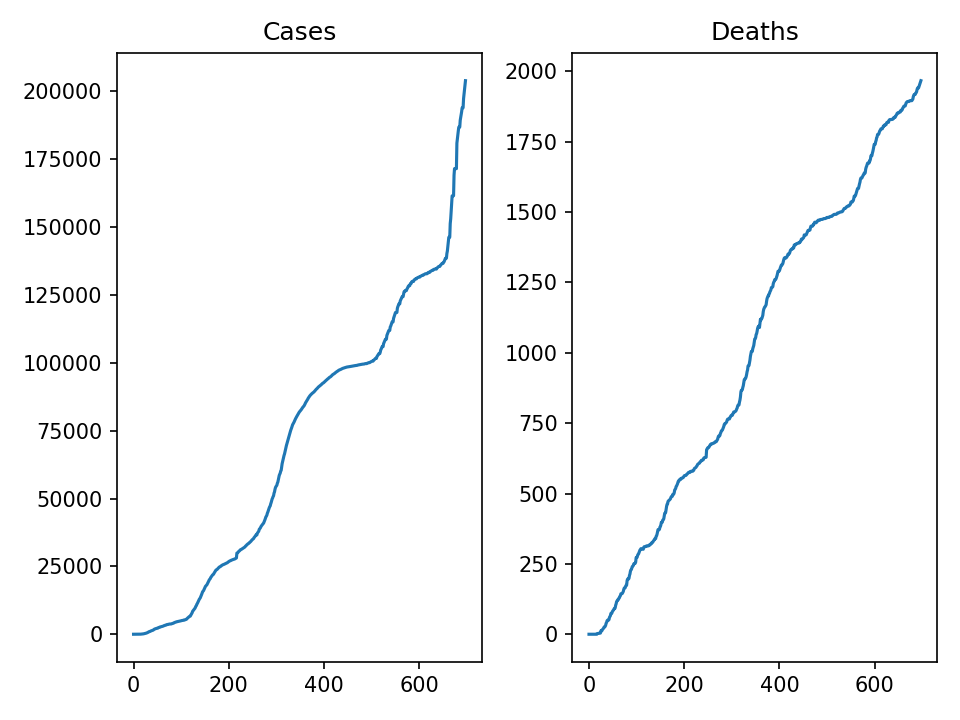

In [7]:
# Visualizing time dependency of cases and deaths for a particular county
fulton = covid[covid['county'] == 'Fulton, Georgia']
xs = range(len(fulton))

plt.subplot(1, 2, 1)
plt.plot(xs, fulton.cases)
plt.title('Cases')

plt.subplot(1, 2, 2)
plt.plot(xs, fulton.deaths)
plt.title('Deaths')

plt.tight_layout()
plt.show()

In [8]:
# Extracting final cumulative cases and deaths per county
covid_total = covid.groupby('county').max()
covid_total.dropna(inplace=True)
covid_total

cases  deaths
county                                   
Abbeville, South Carolina    6104    57.0
Acadia, Louisiana           14951   269.0
Accomack, Virginia           6569    90.0
Ada, Idaho                 103141   915.0
Adair, Iowa                  1488    46.0
...                           ...     ...
Yuma, Arizona               57792  1046.0
Yuma, Colorado               1703    22.0
Zapata, Texas                2889    47.0
Zavala, Texas                3714    58.0
Ziebach, South Dakota         516    11.0

[3199 rows x 2 columns]

In [9]:
# Summary stats
covid_total.describe()

cases        deaths
count  3.199000e+03   3199.000000
mean   2.321600e+04    280.190685
std    8.613328e+04   1106.320576
min    0.000000e+00      0.000000
25%    2.319500e+03     34.500000
50%    5.803000e+03     84.000000
75%    1.524650e+04    203.000000
max    2.611089e+06  38162.000000

## General Health Data

In [10]:
# Defining function for cleaning up data from chronicdata.cdc.gov
def makehealthcsv(x, colname, boolean_whether_you_want_latitude):
    
    # Filter
    x = x[(x['Stratification1'] == 'Overall') &  (x['Stratification2'] == 'Overall')]
    
    # Use state abbreviation dictionary and create county name column to be consistent with other dataframes
    x = x[x["LocationAbbr"].isin(us_state_abbrev)]
    x['county'] = x['LocationDesc'] + ', ' + x['LocationAbbr'].apply(lambda x: us_state_abbrev[x])
    x['county'] = x['county'].str.replace(' County', '').str.replace(' Parish', '')
    if boolean_whether_you_want_latitude:
        x = x[['county','Data_Value', 'Y_lat', 'X_lon']].dropna() #CARLA - Changed 02/03/2022 to add latitude and longitude
    else:
        x = x[['county','Data_Value']].dropna()
    
    # Drop missing data, duplicates, and rename column of interest
    #x = x[['county','Data_Value', 'Y_lat', 'X_lon']].dropna() #CARLA - Changed 02/03/2022 to add latitude and longitude
    x.rename(columns = {'Data_Value' : colname}, inplace=True)
    x.drop_duplicates('county', inplace=True)
    x.set_index('county', inplace=True)
    
    return x

In [11]:
# Heart disease data by county
heart_disease = makehealthcsv(pd.read_csv("resources/Heart-Disease-by-County.csv"), 'Heart Disease', True)
heart_disease

Heart Disease      Y_lat       X_lon
county                                                      
Aleutians East, Alaska          155.2  55.442393 -161.959930
Aleutians West, Alaska          174.2  53.648343 -166.917533
Anchorage, Alaska               249.3  61.159145 -149.104559
Bethel, Alaska                  349.8  60.923648 -159.753262
Denali, Alaska                  319.2  63.678820 -149.960801
...                               ...        ...         ...
Teton, Wyoming                  170.5  43.926156 -110.594230
Uinta, Wyoming                  353.4  41.289493 -110.555808
Washakie, Wyoming               314.5  43.903392 -107.686546
Weston, Wyoming                 290.6  43.841816 -104.571415
Wyoming, Wyoming                293.0  42.998400 -107.552000

[3264 rows x 3 columns]

In [12]:
# Summary stats
heart_disease.describe()

Heart Disease        Y_lat        X_lon
count    3264.000000  3264.000000  3264.000000
mean      350.522855    37.948726   -91.452416
std        85.610860     6.108295    14.581905
min        52.700000    15.189979  -166.917533
25%       293.550000    34.349961   -98.092873
50%       340.250000    38.227434   -89.920381
75%       397.450000    41.688774   -82.925733
max       810.500000    69.309529   145.751259

In [13]:
# Stroke data by county
stroke = makehealthcsv(pd.read_csv("resources/Stroke-by-County.csv"), 'Stroke', False)
stroke

Stroke
county                        
Aleutians East, Alaska     2.0
Aleutians West, Alaska     0.0
Anchorage, Alaska         63.7
Bethel, Alaska           105.5
Denali, Alaska            58.0
...                        ...
Teton, Wyoming            48.2
Uinta, Wyoming            52.8
Washakie, Wyoming         66.3
Weston, Wyoming           60.0
Wyoming, Wyoming          59.8

[3260 rows x 1 columns]

In [14]:
# Summary stats
stroke.describe()

Stroke
count  3260.000000
mean     75.284693
std      16.937617
min       0.000000
25%      64.200000
50%      74.100000
75%      85.000000
max     173.800000

## Vaccination Data

In [15]:
# Read raw csv
vaccine_data = pd.read_csv('resources/vaccine_data.csv')
vaccine_data

Unnamed: 0  Unnamed: 0.1        Date   FIPS  MMWR_week  \
0                0             0  02/03/2022  01007          5   
1                1             1  02/03/2022    UNK          5   
2                2             2  02/03/2022  18071          5   
3                3             3  02/03/2022  27111          5   
4                4             4  02/03/2022  20203          5   
...            ...           ...         ...    ...        ...   
299995      299995        299995  11/04/2021  46123         44   
299996      299996        299996  11/04/2021  35029         44   
299997      299997        299997  11/04/2021  21027         44   
299998      299998        299998  11/04/2021  13185         44   
299999      299999        299999  11/04/2021  47121         44   

               Recip_County Recip_State  Completeness_pct  \
0               Bibb County          AL              92.4   
1            Unknown County          AZ              97.7   
2            Jackson County          IN              98.6   
3         Otter Tail County          MN              94.6   
4            Wichita County          KS              93.5   
...                     ...         ...               ...   
299995         Tripp County          SD              96.3   
299996          Luna County          NM              97.2   
299997  Breckinridge County          KY              94.0   
299998       Lowndes County          GA              58.1   
299999         Meigs County          TN              97.9   

        Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  ...  \
0                         9361.0                        41.8  ...   
1                       128769.0                         0.0  ...   
2                        25620.0                        57.9  ...   
3                        32006.0                        54.5  ...   
4                         1137.0                        53.7  ...   
...                          ...                         ...  ...   
299995                    2435.0                        44.8  ...   
299996                   17024.0                        71.8  ...   
299997                    8839.0                        43.2  ...   
299998                   34553.0                        29.4  ...   
299999                    8639.0                        69.5  ...   

        Series_Complete_Pop_Pct_UR_Equity  \
0                                     2.0   
1                                     NaN   
2                                     8.0   
3                                     7.0   
4                                     8.0   
...                                   ...   
299995                                7.0   
299996                                8.0   
299997                                6.0   
299998                                1.0   
299999                                8.0   

        Series_Complete_5PlusPop_Pct_UR_Equity  \
0                                          2.0   
1                                          NaN   
2                                          8.0   
3                                          8.0   
4                                          8.0   
...                                        ...   
299995                                     NaN   
299996                                     NaN   
299997                                     NaN   
299998                                     NaN   
299999                                     NaN   

        Series_Complete_12PlusPop_Pct_UR_Equity  \
0                                           2.0   
1                                           NaN   
2                                           8.0   
3                                           8.0   
4                                           8.0   
...                                         ...   
299995                                      7.0   
299996                                      8.0   
299997                                      7.0   
2

In [16]:
# Extract final vaccination (two doses) rates 
vaccine = vaccine_data.groupby(['Recip_County', 'Recip_State'])['Series_Complete_Pop_Pct'].max().reset_index()

# Get full county name in format consistent with other dataframes
vaccine = vaccine[vaccine["Recip_State"].isin(us_state_abbrev)]
vaccine['county'] = vaccine['Recip_County'] + ', ' + vaccine['Recip_State'].apply(lambda x: us_state_abbrev[x])
vaccine['county'] = vaccine['county'].str.replace(' County', '').str.replace(' Parish', '')

# Drop NaNs, rename column, set index for merging
vaccine = vaccine[['county','Series_Complete_Pop_Pct']].dropna()
vaccine.rename(columns={'Series_Complete_Pop_Pct': "Vaccination Rate"}, inplace=True)
vaccine.set_index('county', inplace=True)
vaccine

Vaccination Rate
county                                     
Abbeville, South Carolina              39.2
Acadia, Louisiana                      51.8
Accomack, Virginia                     70.7
Ada, Idaho                             62.9
Adair, Iowa                            48.5
...                                     ...
Yuma, Arizona                          66.6
Yuma, Colorado                         42.8
Zapata, Texas                          58.9
Zavala, Texas                          56.0
Ziebach, South Dakota                  31.0

[3278 rows x 1 columns]

In [17]:
# Summary stats
vaccine.describe()

Vaccination Rate
count       3278.000000
mean          49.448078
std           14.387656
min            0.000000
25%           41.200000
50%           48.750000
75%           57.600000
max           99.900000

## Election Data

In [18]:
# Read csv and look at most recent election results by county
party = pd.read_csv('resources/election_data.csv')
party = party[party['year'] == 2020]

# Combine county and state names into sinlge column 
party['county'] = party['county_name'].str.title() + ', ' + party['state'].str.title()
party.drop(columns = ['state', 'state_po', 'county_name', 'county_fips'], inplace=True)
party

year        office          candidate        party  candidatevotes  \
50524  2020     PRESIDENT  JOSEPH R BIDEN JR     DEMOCRAT          7503.0   
50525  2020     PRESIDENT              OTHER        OTHER           429.0   
50526  2020     PRESIDENT     DONALD J TRUMP   REPUBLICAN         19838.0   
50527  2020     PRESIDENT  JOSEPH R BIDEN JR     DEMOCRAT         24578.0   
50528  2020     PRESIDENT              OTHER        OTHER          1557.0   
...     ...           ...                ...          ...             ...   
72612  2020  US PRESIDENT     DONALD J TRUMP   REPUBLICAN          3245.0   
72613  2020  US PRESIDENT  JOSEPH R BIDEN JR     DEMOCRAT           360.0   
72614  2020  US PRESIDENT       JO JORGENSEN  LIBERTARIAN            46.0   
72615  2020  US PRESIDENT              OTHER        OTHER            47.0   
72616  2020  US PRESIDENT     DONALD J TRUMP   REPUBLICAN          3107.0   

       totalvotes   version   mode             county  
50524     27770.0  20210622  TOTAL   Autauga, Alabama  
50525     27770.0  20210622  TOTAL   Autauga, Alabama  
50526     27770.0  20210622  TOTAL   Autauga, Alabama  
50527    109679.0  20210622  TOTAL   Baldwin, Alabama  
50528    109679.0  20210622  TOTAL   Baldwin, Alabama  
...           ...       ...    ...                ...  
72612      4032.0  20210622  TOTAL  Washakie, Wyoming  
72613      3560.0  20210622  TOTAL    Weston, Wyoming  
72614      3560.0  20210622  TOTAL    Weston, Wyoming  
72615      3560.0  20210622  TOTAL    Weston, Wyoming  
72616      3560.0  20210622  TOTAL    Weston, Wyoming  

[22093 rows x 9 columns]

In [19]:
# For each county, add up votes and determine winning party
# Perhaps cleaner way of doing this but my brain has melted

prev_county = party.iloc[0].county
parties = {}
winners = {}

for index, row in party.iterrows():
    
    # Populate set of parties with corresponding votes
    if row['county'] == prev_county:
        if row['party'] not in parties:
            parties[row['party']] = row['candidatevotes']
        else:
            parties[row['party']] += row['candidatevotes']
        
        # Find winner if we reach last row
        if index == party.iloc[-1].name:
            most_votes = 0
            for p in parties:
                if parties[p] > most_votes:
                    winner = p
                    most_votes = parties[p]
                
            winners[prev_county] = winner
    
    # Find winner if row is for new county
    elif row['county'] != prev_county:
        most_votes = 0
        for p in parties:
            if parties[p] > most_votes:
                winner = p
                most_votes = parties[p]
                
        winners[prev_county] = winner
        
        # Reset vote counts, set new county
        parties = {}
        prev_county = row['county']
        parties[row['party']] = row['candidatevotes']

In [20]:
# Replace party column with winning party for each county
party['party'] = [winners[county] for county in party['county']]

# Extract column of interest
party_df = party.groupby('county')['party'].max()

display(party_df)
print("Totals:")
display(party_df.value_counts())

county
Abbeville, South Carolina    REPUBLICAN
Acadia, Louisiana            REPUBLICAN
Accomack, Virginia           REPUBLICAN
Ada, Idaho                   REPUBLICAN
Adair, Iowa                  REPUBLICAN
                                ...    
Yuma, Arizona                REPUBLICAN
Yuma, Colorado               REPUBLICAN
Zapata, Texas                REPUBLICAN
Zavala, Texas                  DEMOCRAT
Ziebach, South Dakota          DEMOCRAT
Name: party, Length: 3155, dtype: object

Totals:


REPUBLICAN    2596
DEMOCRAT       559
Name: party, dtype: int64

## Combined Data

In [21]:
# Concatenate above dataframes 
merged_df = pd.concat([covid_total, vaccine, census, heart_disease, stroke, party_df], join='inner', axis=1)
merged_df.dropna(inplace=True)
merged_df.reset_index(inplace=True)

# Split county and state name into separate columns for future analysis
merged_df[['County','State']] = merged_df.county.str.split(", ",expand=True)
merged_df.drop(columns=['county'], inplace=True)

# New columns for cases and death by capita
merged_df['Cases per Capita'] = merged_df['cases']/merged_df['Population']
merged_df['Deaths per Capita'] = merged_df['deaths']/merged_df['Population']

# Rename columns and save to csv
merged_df.rename(columns = {'cases' : 'Cases', 'deaths' : 'Deaths', 'party': 'Party'}, inplace=True)
merged_df.to_csv('resources/full_data.csv', index=False)

# Filtering out very small and large counties by population and save in separate csv
merged_df.drop(merged_df.loc[merged_df['Population'] < 20000].index, inplace = True)
merged_df.drop(merged_df.loc[merged_df['Population'] > 200000].index, inplace = True)

#Carla Additions 02/03/2022 - Drop repetitive lat and long and rename
#merged_df.drop(["Y_lat_x"], axis = 1, inplace=True)
#merged_df.drop(["X_lon_x"], axis = 1, inplace=True) 
merged_df.rename(columns = {'Y_lat' : "Y_Latitude"}, inplace = True) 
merged_df.rename(columns = {'X_lon' : "X_Longitude"}, inplace = True) 


#merged_df.to_csv('resources/data.csv', index=False)

merged_df

Cases  Deaths  Vaccination Rate  Population  Median Age  \
0      6104    57.0              39.2     24657.0        43.8   
1     14951   269.0              51.8     62568.0        36.2   
2      6569    90.0              70.7     32742.0        45.9   
6      5535    56.0              44.0     25325.0        27.7   
7      6678    65.0              34.8     22113.0        37.6   
...     ...     ...               ...         ...         ...   
2983   7537    95.0              47.5     27974.0        35.7   
2984   6386    94.0              47.6     21573.0        39.3   
2986  38255   486.0              50.5    157816.0        38.2   
2993   9037    88.0              65.3     67587.0        39.5   
2995  15811   104.0              51.1     75493.0        32.5   

      Household Income  Heart Disease  Y_Latitude  X_Longitude  Stroke  \
0              36685.0          321.0   34.220589   -82.457629    78.6   
1              41177.0          476.2   30.299520   -92.403448    93.6   
2              43210.0          411.2   37.775819   -75.650899    92.1   
6              40046.0          335.1   40.190320   -92.606365    80.7   
7              32986.0          575.0   35.891869   -94.654780    62.7   
...                ...            ...         ...          ...     ...   
2983           31402.0          368.6   32.784336   -90.389419   119.6   
2984           42361.0          472.9   35.005864   -93.401676    86.2   
2986           59117.0          322.4   45.937601  -108.274875    70.9   
2993           90367.0          233.0   37.237051   -76.560303    72.0   
2995           52624.0          370.1   39.267272  -121.341053    87.2   

           Party       County           State  Cases per Capita  \
0     REPUBLICAN    Abbeville  South Carolina          0.247556   
1     REPUBLICAN       Acadia       Louisiana          0.238956   
2     REPUBLICAN     Accomack        Virginia          0.200629   
6     REPUBLICAN        Adair        Missouri          0.218559   
7     REPUBLICAN        Adair        Oklahoma          0.301994   
...          ...          ...             ...               ...   
2983    DEMOCRAT        Yazoo     Mississippi          0.269429   
2984  REPUBLICAN         Yell        Arkansas          0.296018   
2986  REPUBLICAN  Yellowstone         Montana          0.242403   
2993  REPUBLICAN         York        Virginia          0.133709   
2995  REPUBLICAN         Yuba      California          0.209437   

      Deaths per Capita  
0              0.002312  
1              0.004299  
2              0.002749  
6              0.002211  
7              0.002939  
...                 ...  
2983           0.003396  
2984           0.004357  
2986           0.003080  
2993           0.001302  
2995           0.001378  

[1446 rows x 15 columns]

In [22]:
# Correlation matrix
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

In [23]:
#Sorting through states and relegating to correct region
#West Region
West_df = merged_df.loc[(merged_df["State"]=="Washington") | (merged_df["State"]=="Oregon")
                        |(merged_df["State"]=="California") | (merged_df["State"]=="Idaho") 
                        | (merged_df["State"]=="Nevada") | (merged_df["State"]=="Utah") 
                        | (merged_df["State"]=="Arizona") | (merged_df["State"]=="Alaska") 
                        | (merged_df["State"]=="Hawaii"),:]

#Plains Region
Plains_df = merged_df.loc[(merged_df["State"]=="Montana") | (merged_df["State"]=="North Dakota")
                        |(merged_df["State"]=="South Dakota") | (merged_df["State"]=="Wyoming") 
                        | (merged_df["State"]=="Nebraska") | (merged_df["State"]=="Colorado") 
                        | (merged_df["State"]=="Oklahoma") | (merged_df["State"]=="Kansas") 
                        | (merged_df["State"]=="Texas") | (merged_df["State"]=="New Mexico"),:]

#Midwest Region
Midwest_df = merged_df.loc[(merged_df["State"]=="Minnesota") | (merged_df["State"]=="Wisconsin")
                        |(merged_df["State"]=="Michigan") | (merged_df["State"]=="Iowa") 
                        | (merged_df["State"]=="Illinois") | (merged_df["State"]=="Indiana") 
                        | (merged_df["State"]=="Ohio") | (merged_df["State"]=="Missouri") 
                        | (merged_df["State"]=="Kentucky"),:]

#Southeast Region
Southeast_df = merged_df.loc[(merged_df["State"]=="Arkansas") | (merged_df["State"]=="Louisiana")
                        |(merged_df["State"]=="Tennessee") | (merged_df["State"]=="Mississippi") 
                        | (merged_df["State"]=="Alabama") | (merged_df["State"]=="Georgia") 
                        | (merged_df["State"]=="Florida") | (merged_df["State"]=="North Carolina") 
                        | (merged_df["State"]=="South Carolina"),:]
#Northeast Region of US
Northeast_df = merged_df.loc[(merged_df["State"]=="Maine") | (merged_df["State"]=="New Hampshire")
                        |(merged_df["State"]=="Vermont") | (merged_df["State"]=="New York") 
                        | (merged_df["State"]=="Massachusetts") | (merged_df["State"]=="Connecticut") 
                        | (merged_df["State"]=="Rhode Island") | (merged_df["State"]=="New Jersey") 
                        | (merged_df["State"]=="Pennsylvania") | (merged_df["State"]=="Delaware") 
                        | (merged_df["State"]=="West Virginia") | (merged_df["State"]=="Virginia")
                        | (merged_df["State"]=="Maryland"),:]

#labels
West = ["Washington","Oregon","California","Idaho","Nevada","Utah","Arizona","Alaska","Hawaii"]
Plains = ["Montana","North Dakota","South Dakota","Wyoming","Nebraska","Colorado","Oklahoma","Kansas","Texas","New Mexico"]
Midwest = ["Minnesota","Wisconsin","Michigan","Iowa","Illinois","Indiana","Ohio","Missouri","Kentucky"]
Southeast = ["Arkanas","Louisiana","Tennessee","Mississippi","Alabama","Georgia","Florida","North Carolina","South Carolina"]
Northeast = ["Maine","New Hampshire","Vermont","New York","Massachusetts","Connecticut","Rhode Island",
             "New Jersey","Pennsylvania","Delaware","West Virginia","Virginia","Maryland"]

<IPython.core.display.Javascript object>


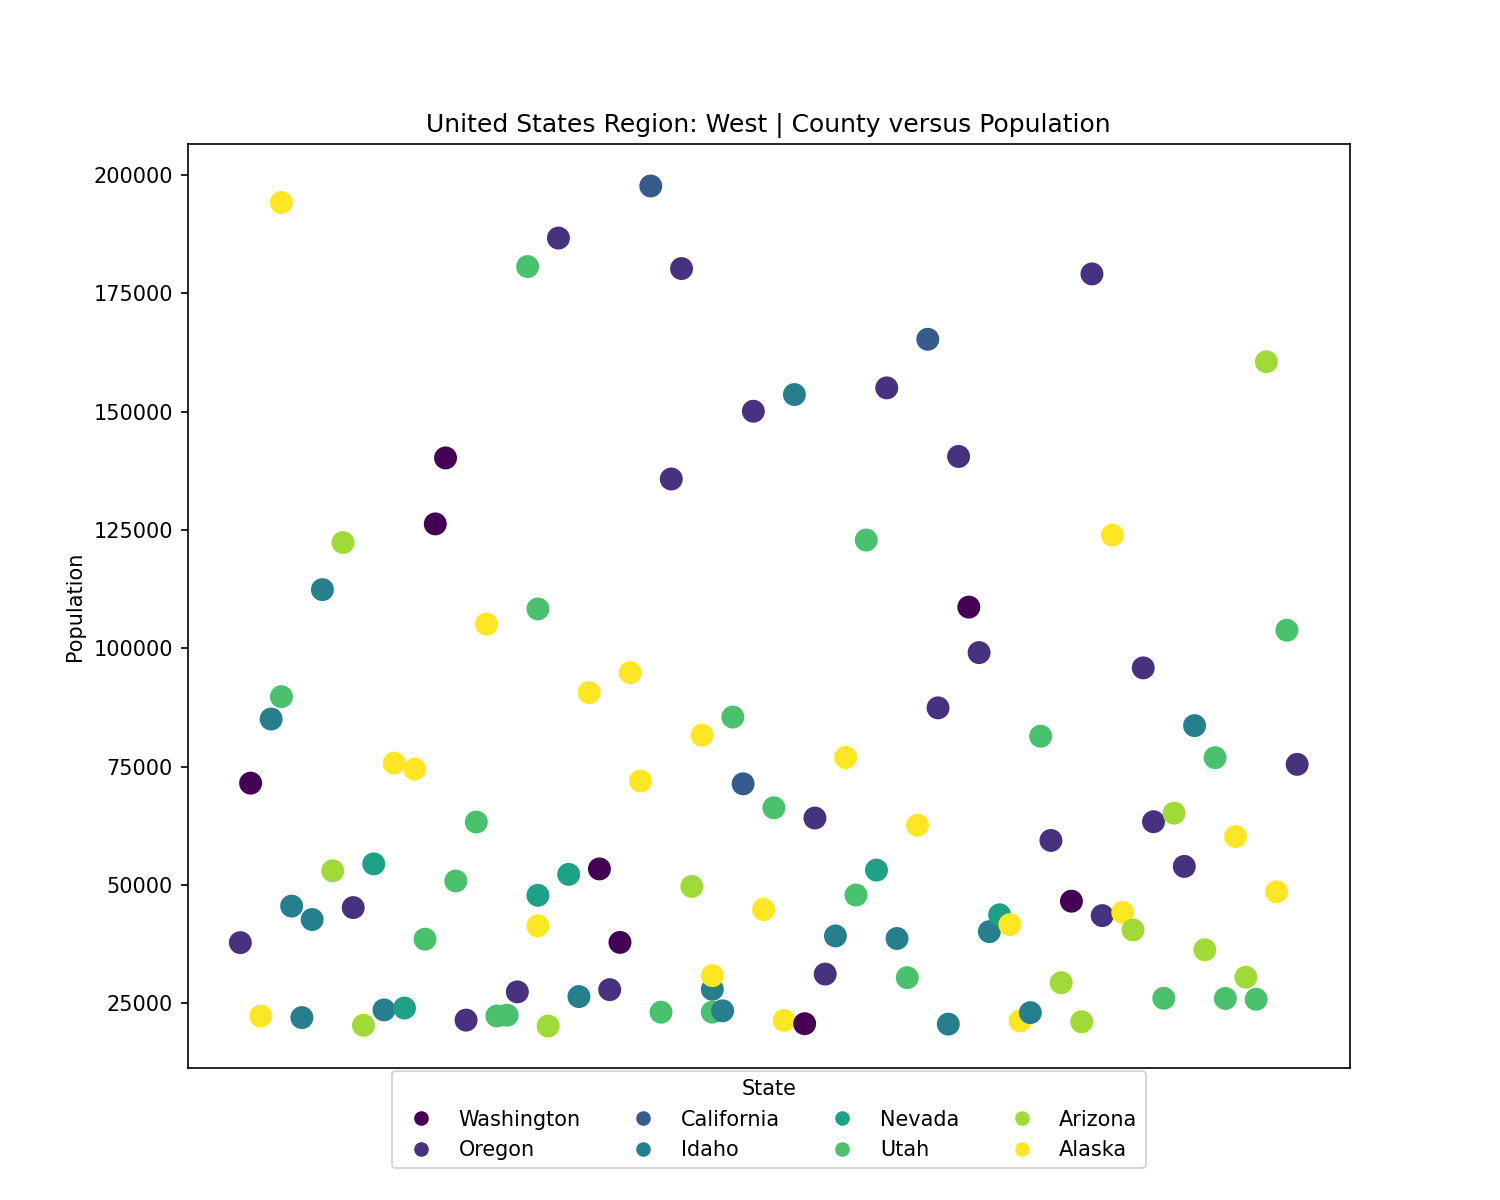

<IPython.core.display.Javascript object>


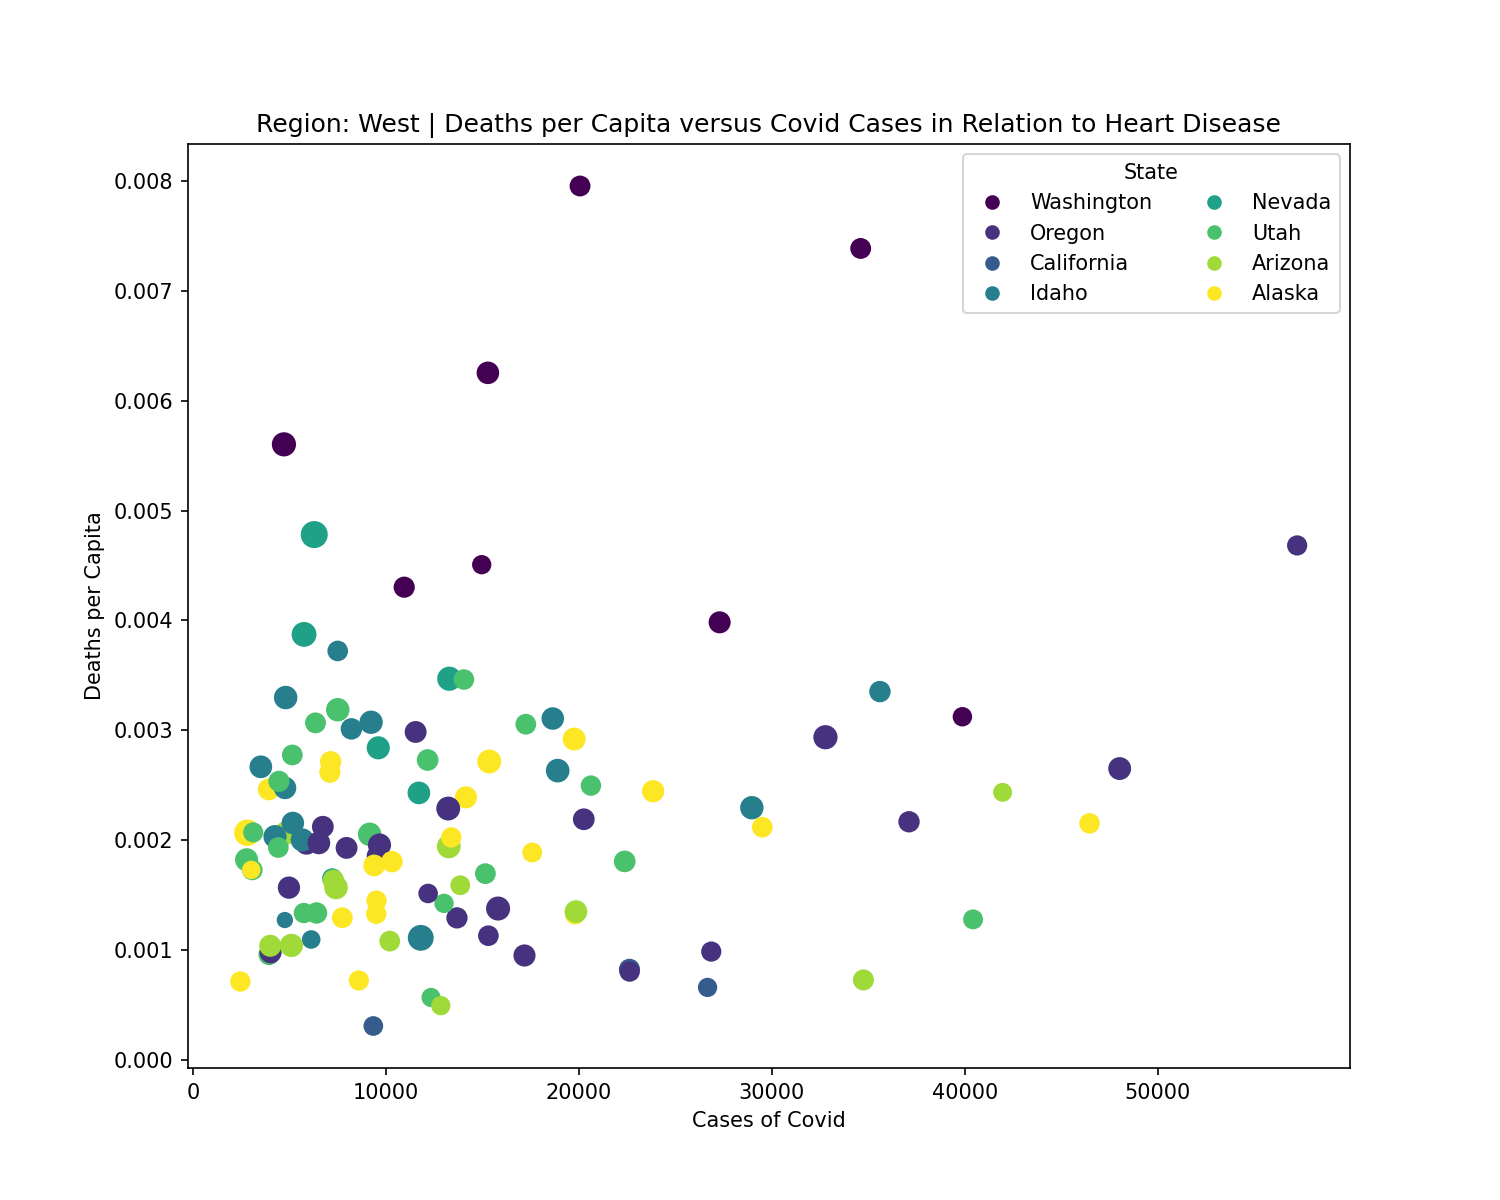

This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.


In [24]:
#Variables
West_co = West_df["County"]
West_pop = West_df["Population"]
West_cases = West_df["Cases"]
West_heart = West_df["Heart Disease"]
West_cap = West_df["Deaths per Capita"]

#Plot Graph
plt.figure(figsize=(10,8))
plt.ylabel("Population")
Scatter = plt.scatter(West_co, West_pop,s=100,
            c=West_df.State.astype('category').cat.codes)
mplcursors.cursor(Scatter,hover=True)
plt.legend(loc="lower center", bbox_to_anchor=(.50, -0.12), ncol= 4, handles=Scatter.legend_elements()[0], 
           labels=West,
           title="State")
Scatter.axes.get_xaxis().set_visible(False)
plt.title("United States Region: West | County versus Population")

#Deaths per capita
#Plot Graph
plt.figure(figsize=(10,8))
plt.xlabel("Cases of Covid")
plt.ylabel("Deaths per Capita")
Scatter2 = plt.scatter(West_cases, West_cap,s=West_heart*.3,
            c=West_df.State.astype('category').cat.codes)
#Hover Event
mplcursors.cursor(Scatter2, hover=True)
plt.legend(loc="upper right", ncol= 2, handles=Scatter2.legend_elements()[0], 
           labels=West,
           title="State")
plt.title("Region: West | Deaths per Capita versus Covid Cases in Relation to Heart Disease")
print("This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.")

<IPython.core.display.Javascript object>


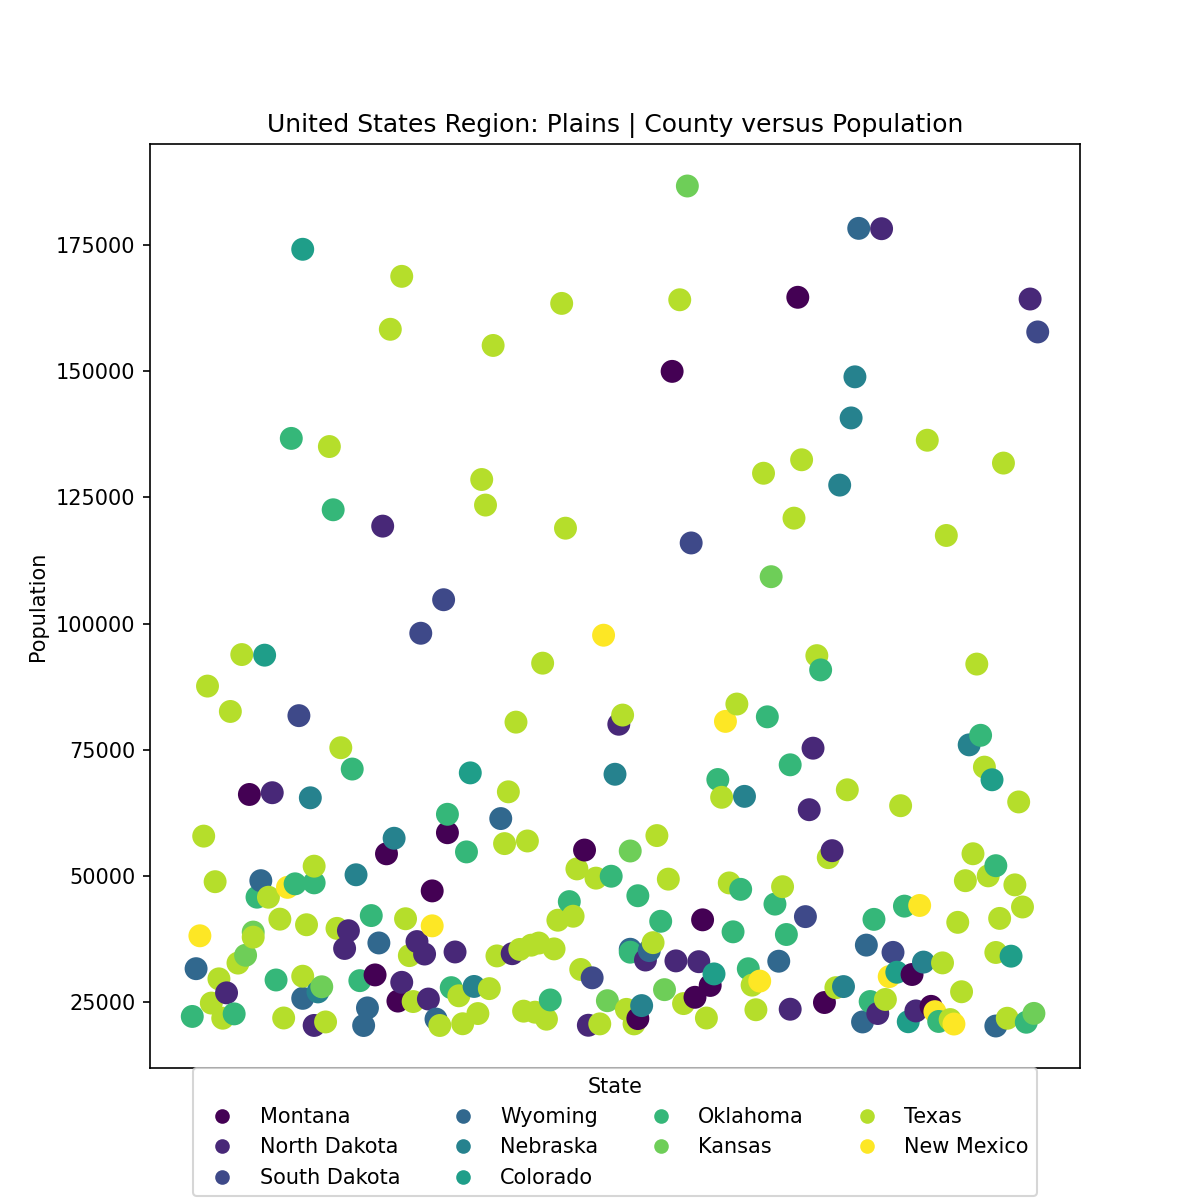

<IPython.core.display.Javascript object>


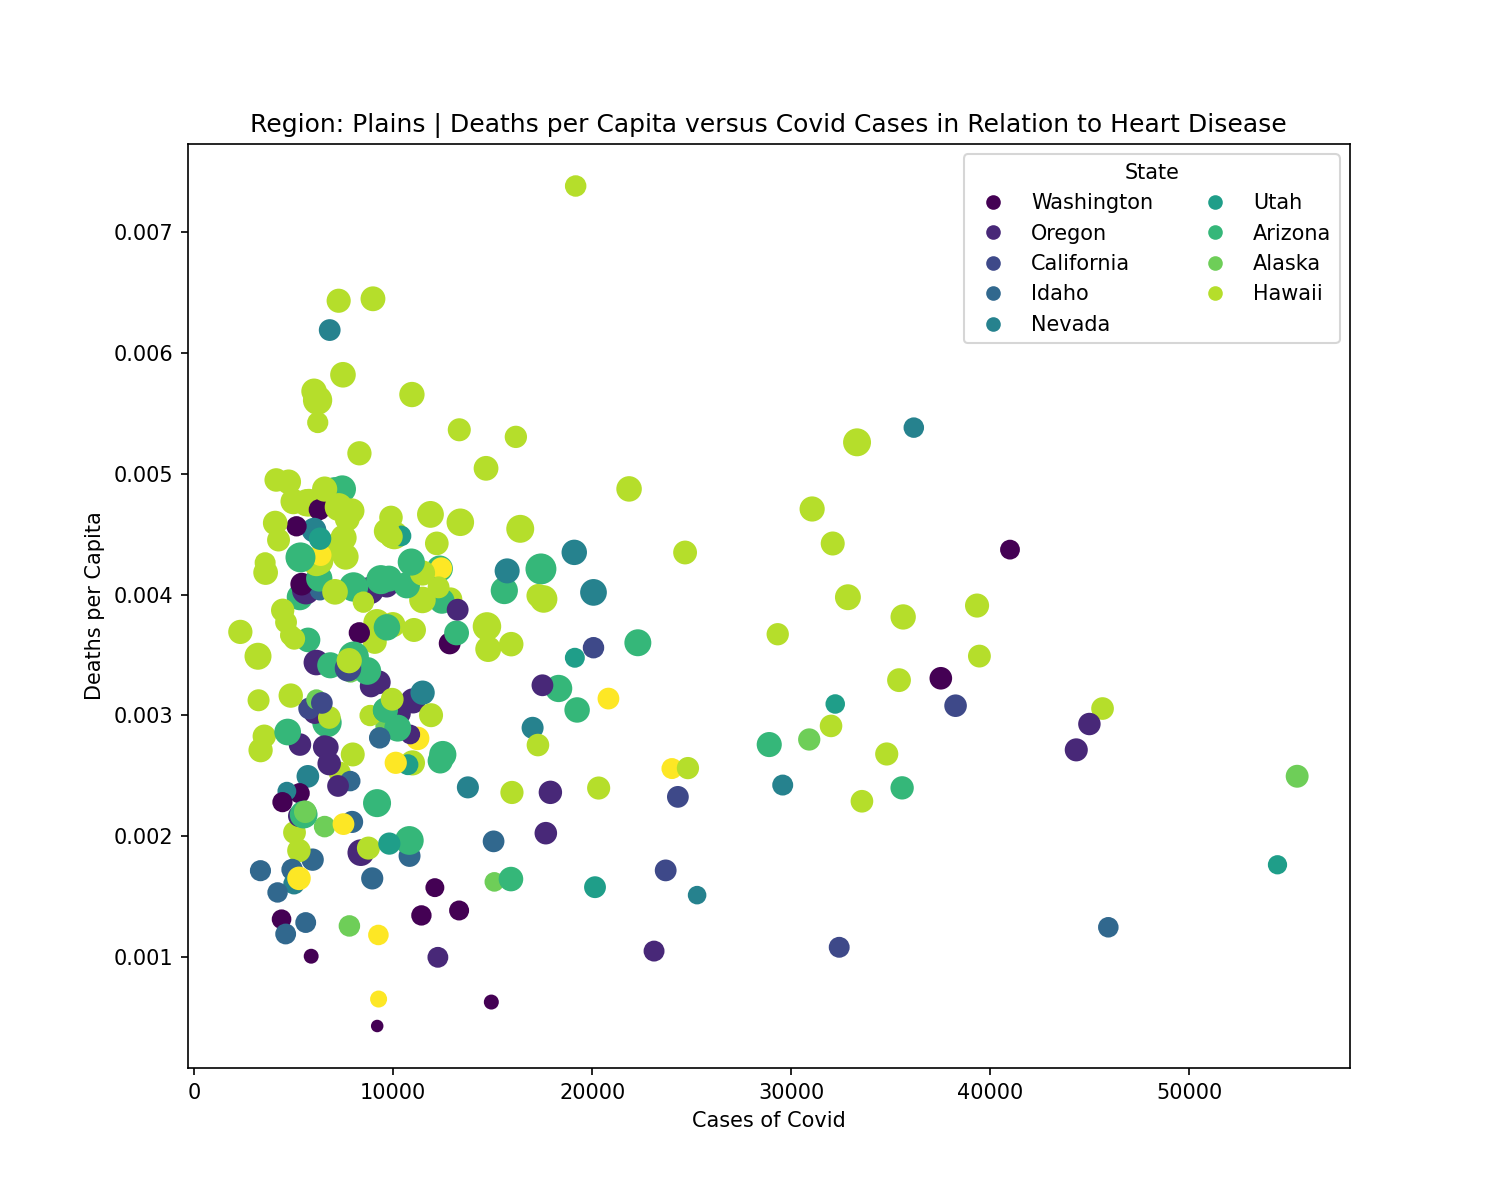

This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.


In [25]:
#Variables
Plains_co = Plains_df["County"]
Plains_pop = Plains_df["Population"]
Plains_cases = Plains_df["Cases"]
Plains_heart = Plains_df["Heart Disease"]
Plains_cap = Plains_df["Deaths per Capita"]

#Plot Graph for County and population size
plt.figure(figsize=(8,8))
plt.ylabel("Population")
Scatter = plt.scatter(Plains_co, Plains_pop,s=100,
            c=Plains_df.State.astype('category').cat.codes)
Scatter.axes.get_xaxis().set_visible(False)
mplcursors.cursor(Scatter, hover=True)
plt.title("United States Region: Plains | County versus Population")
plt.legend(loc="lower center", bbox_to_anchor=(.50, -0.15), ncol= 4, handles=Scatter.legend_elements()[0], 
           labels=Plains,
           title="State")

#Plot Graph
plt.figure(figsize=(10,8))
plt.xlabel("Cases of Covid")
plt.ylabel("Deaths per Capita")
Scatter2 = plt.scatter(Plains_cases, Plains_cap,s=Plains_heart*.3,
            c=Plains_df.State.astype('category').cat.codes)
#Hover Event
mplcursors.cursor(Scatter2, hover=True)
plt.legend(loc="upper right", ncol= 2, handles=Scatter2.legend_elements()[0], 
           labels=West,
           title="State")
plt.title("Region: Plains | Deaths per Capita versus Covid Cases in Relation to Heart Disease")
print("This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.")

<IPython.core.display.Javascript object>


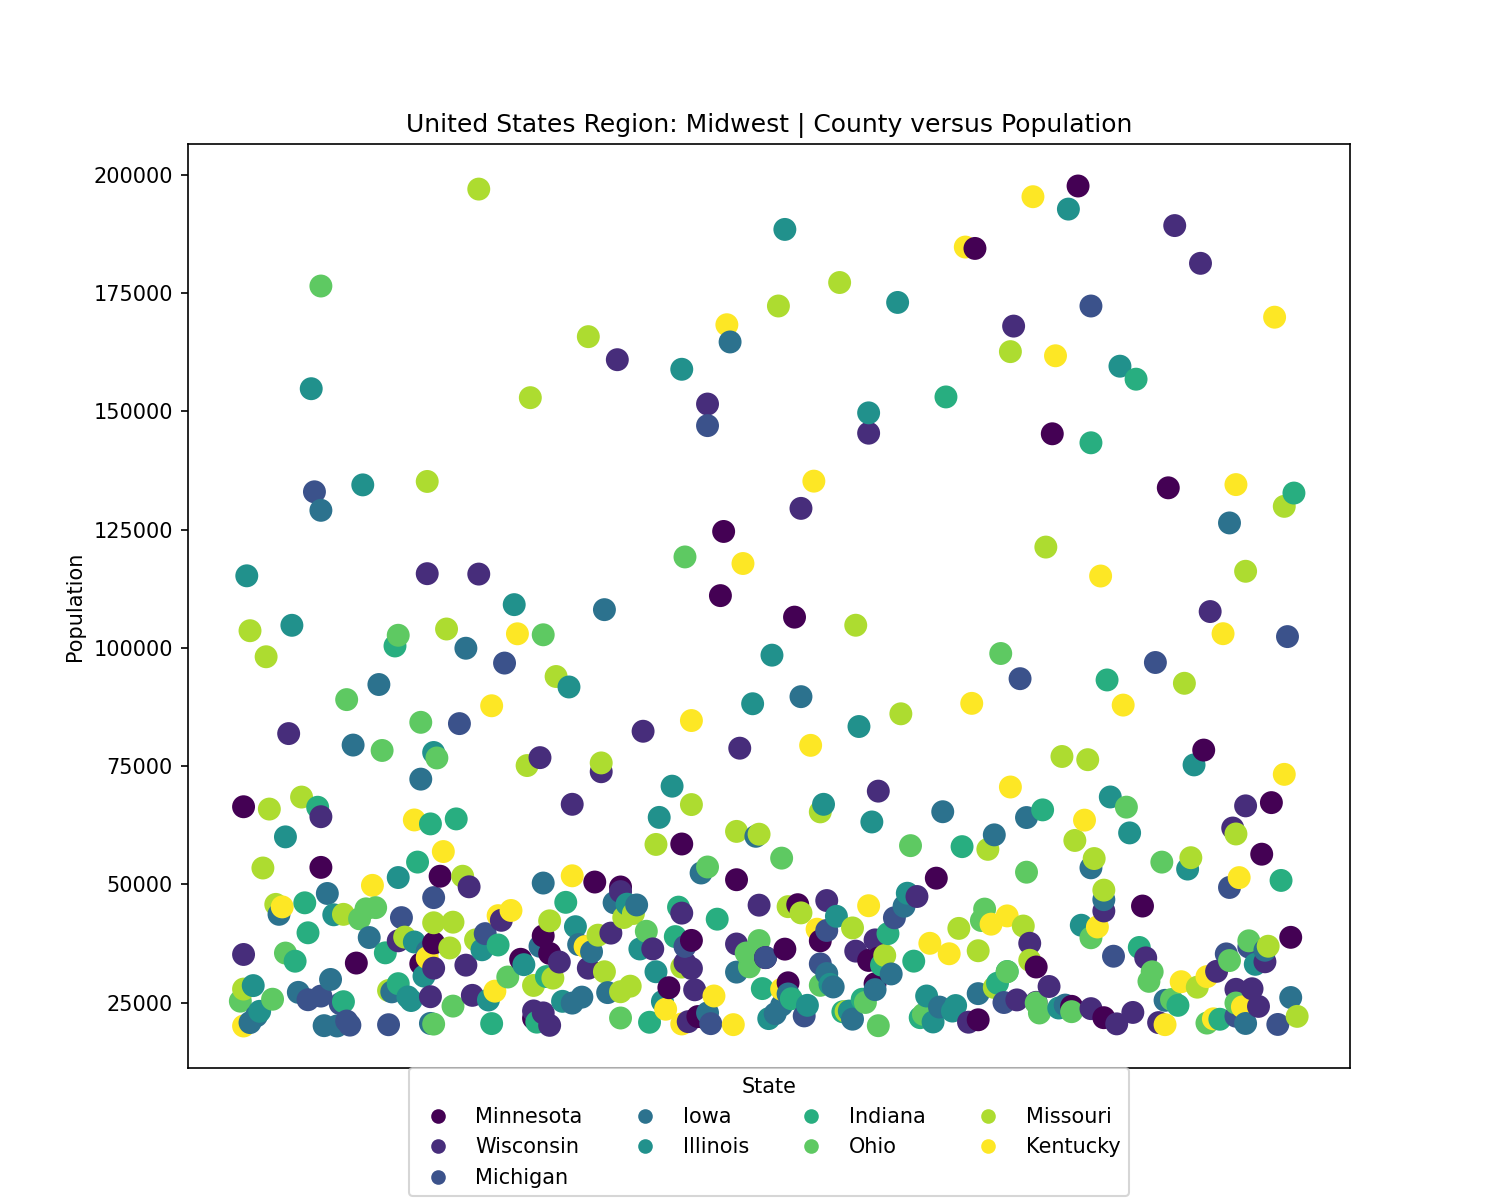

<IPython.core.display.Javascript object>


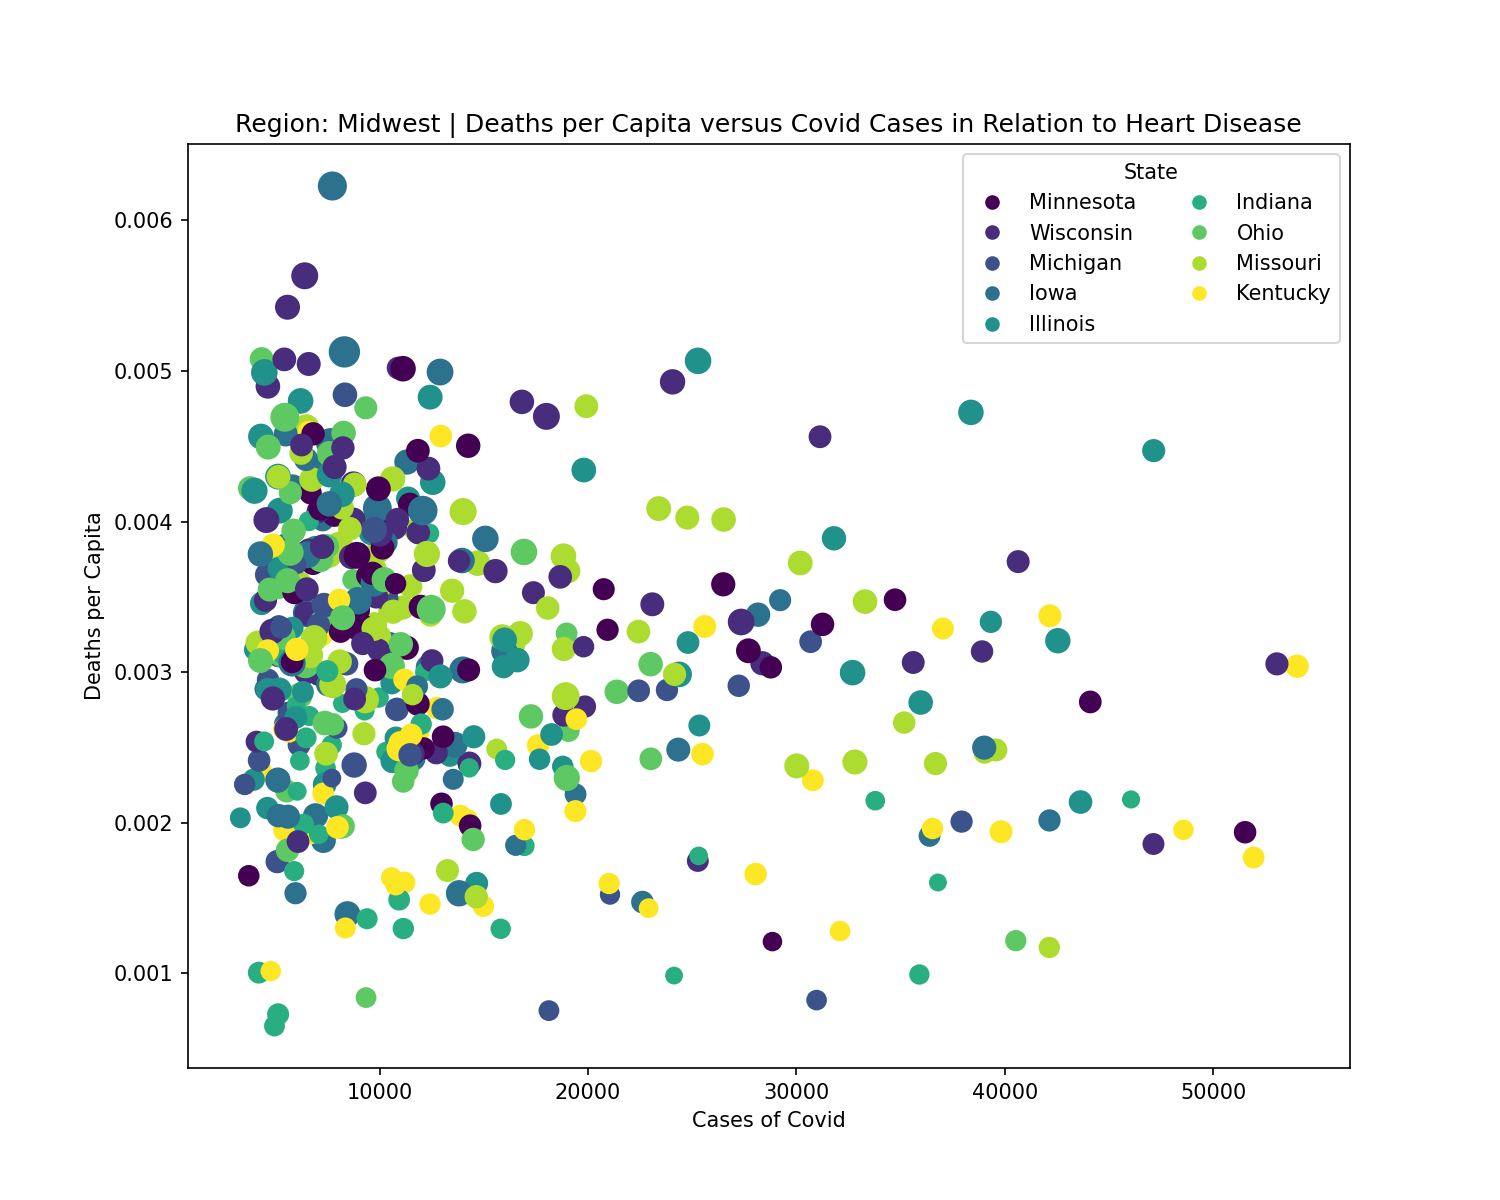

This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.


In [26]:
#Variables
Midwest_co = Midwest_df["County"]
Midwest_pop = Midwest_df["Population"]
Midwest_cases = Midwest_df["Cases"]
Midwest_heart = Midwest_df["Heart Disease"]
Midwest_cap = Midwest_df["Deaths per Capita"]

#Plot Graph
plt.figure(figsize=(10,8))
plt.ylabel("Population")
Scatter = plt.scatter(Midwest_co, Midwest_pop,s=100,
            c=Midwest_df.State.astype('category').cat.codes)
mplcursors.cursor(Scatter, hover=True)
plt.legend(loc="lower center", bbox_to_anchor=(.50, -0.15), ncol= 4, handles=Scatter.legend_elements()[0], 
           labels=Midwest,
           title="State")
Scatter.axes.get_xaxis().set_visible(False)
plt.title("United States Region: Midwest | County versus Population")

#Plot Graph
plt.figure(figsize=(10,8))
plt.xlabel("Cases of Covid")
plt.ylabel("Deaths per Capita")
Scatter2 = plt.scatter(Midwest_cases, Midwest_cap,s=Midwest_heart*.3,
            c=Midwest_df.State.astype('category').cat.codes)
#Hover Event
mplcursors.cursor(Scatter2, hover=True)
plt.legend(loc="upper right", ncol= 2, handles=Scatter2.legend_elements()[0], 
           labels=Midwest,
           title="State")
plt.title("Region: Midwest | Deaths per Capita versus Covid Cases in Relation to Heart Disease")
print("This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.")

<IPython.core.display.Javascript object>


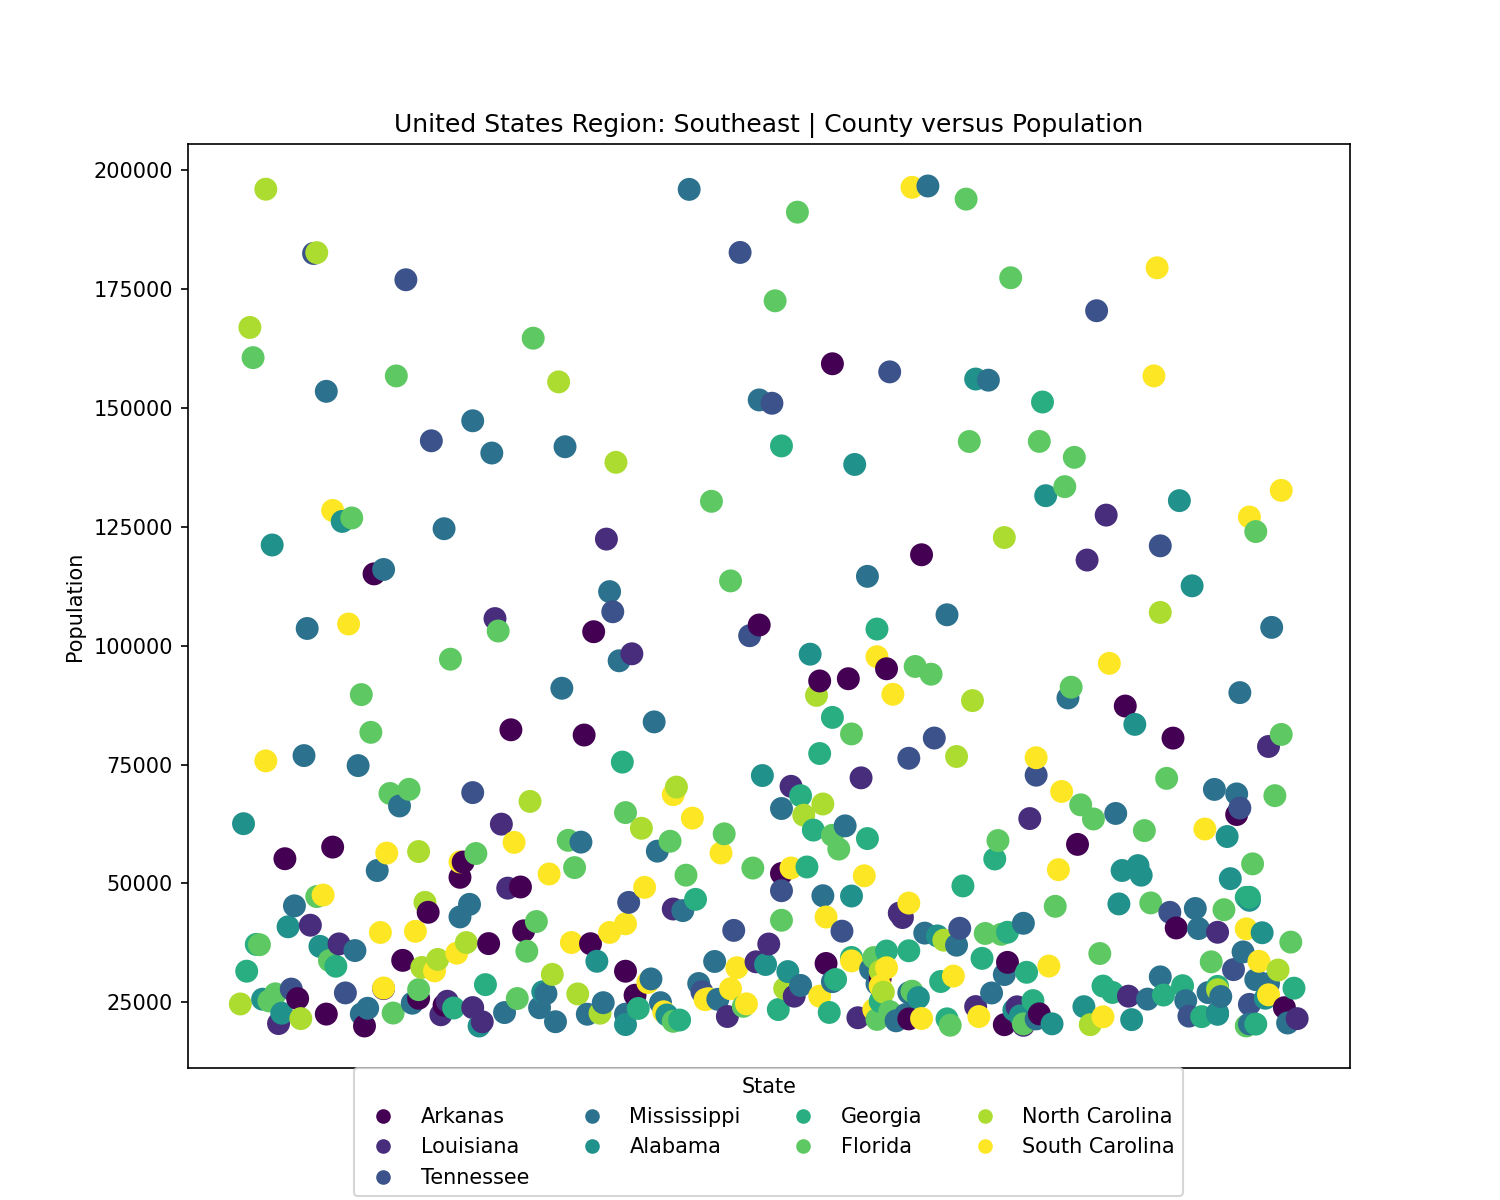

<IPython.core.display.Javascript object>


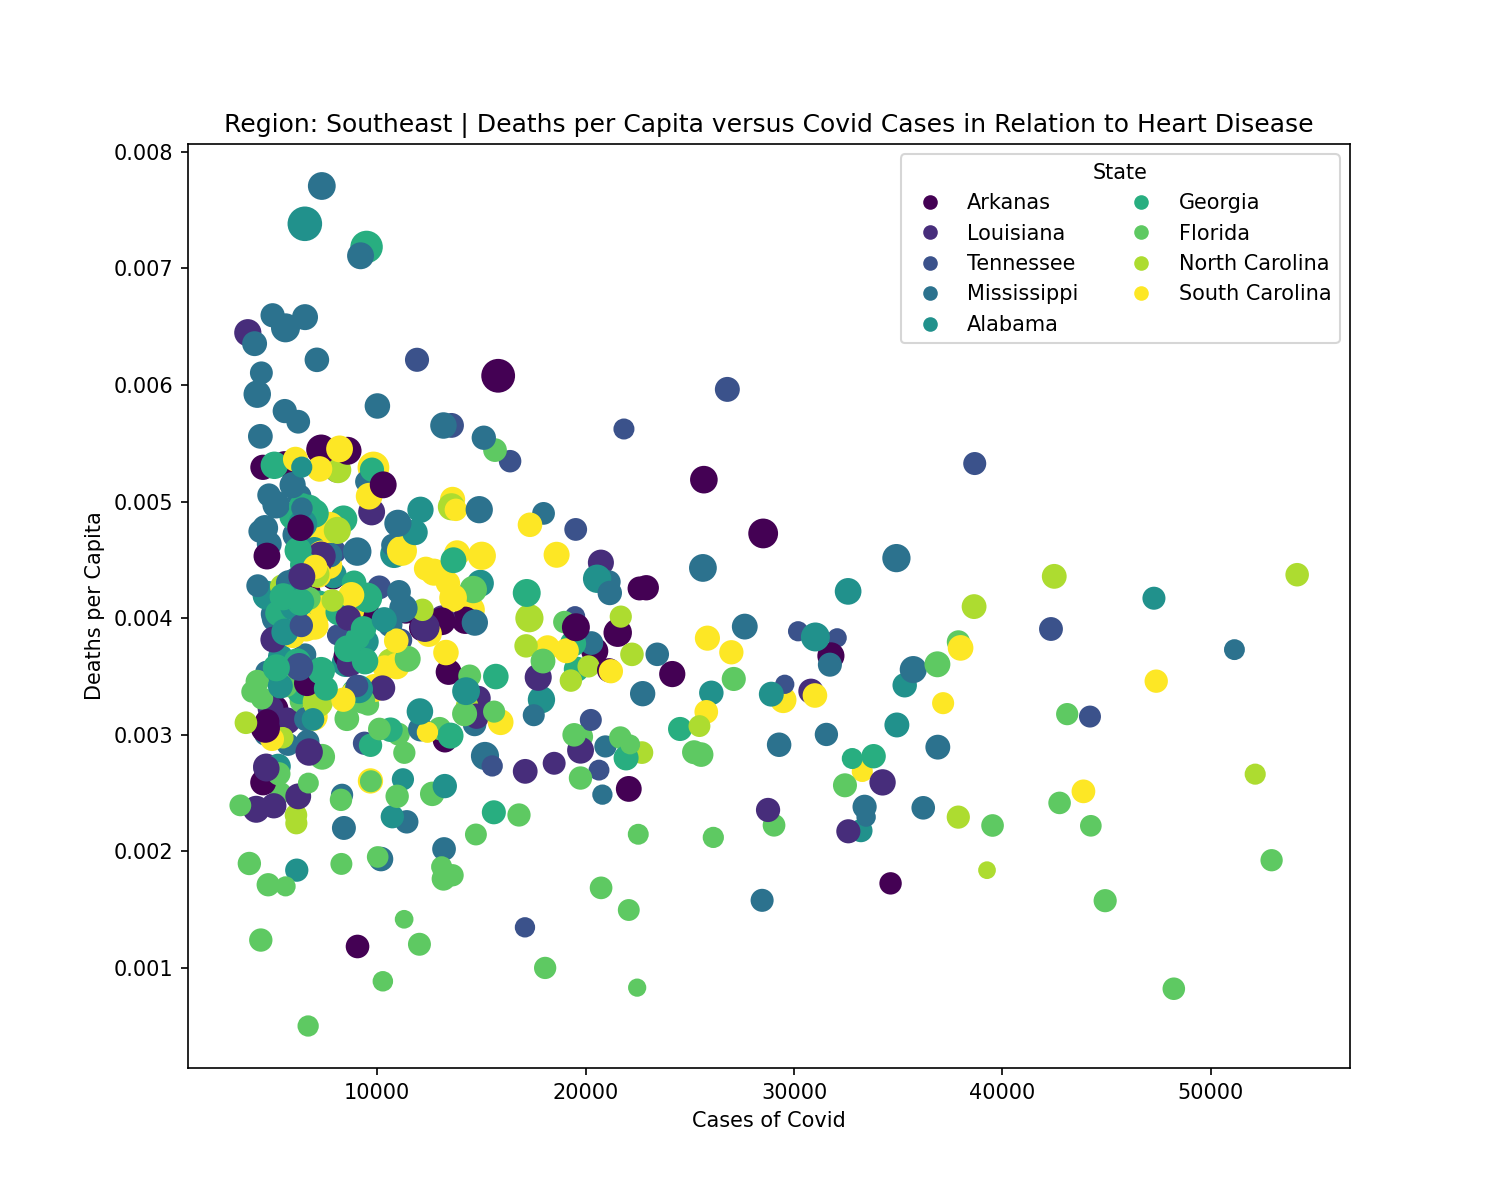

This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.


In [27]:
#Variables
Southeast_co = Southeast_df["County"]
Southeast_pop = Southeast_df["Population"]
Southeast_cases = Southeast_df["Cases"]
Southeast_heart = Southeast_df["Heart Disease"]
Southeast_cap = Southeast_df["Deaths per Capita"]

#Plot Graph
plt.figure(figsize=(10,8))
plt.ylabel("Population")
Scatter = plt.scatter(Southeast_co, Southeast_pop,s=100,
            c=Southeast_df.State.astype('category').cat.codes)
mplcursors.cursor(Scatter, hover=True)
plt.legend(loc="lower center",bbox_to_anchor=(.50, -0.15), ncol= 4, handles=Scatter.legend_elements()[0], 
           labels=Southeast,
           title="State")
Scatter.axes.get_xaxis().set_visible(False)
plt.title("United States Region: Southeast | County versus Population")

#Plot Graph
plt.figure(figsize=(10,8))
plt.xlabel("Cases of Covid")
plt.ylabel("Deaths per Capita")
Scatter2 = plt.scatter(Southeast_cases, Southeast_cap,s=Southeast_heart*.3,
            c=Southeast_df.State.astype('category').cat.codes)
#Hover Event
mplcursors.cursor(Scatter2, hover=True)
plt.legend(loc="upper right", ncol= 2, handles=Scatter2.legend_elements()[0], 
           labels=Southeast,
           title="State")
plt.title("Region: Southeast | Deaths per Capita versus Covid Cases in Relation to Heart Disease")
print("This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.")

<IPython.core.display.Javascript object>


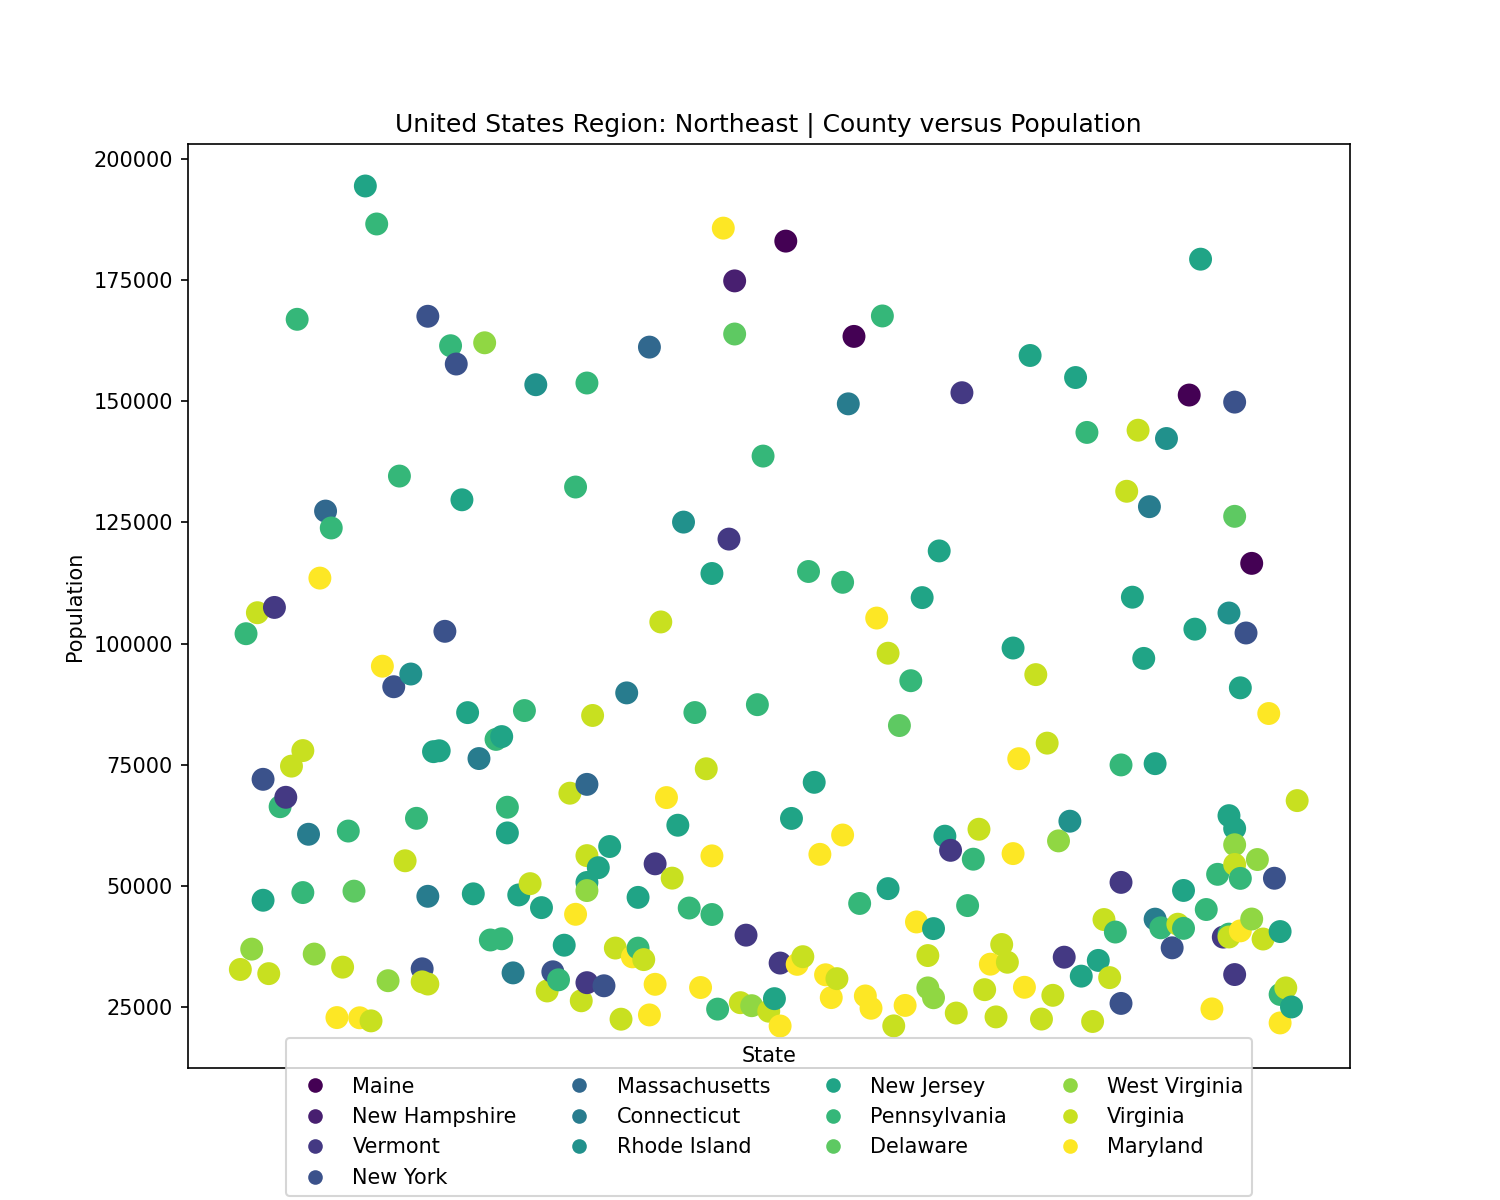

<IPython.core.display.Javascript object>


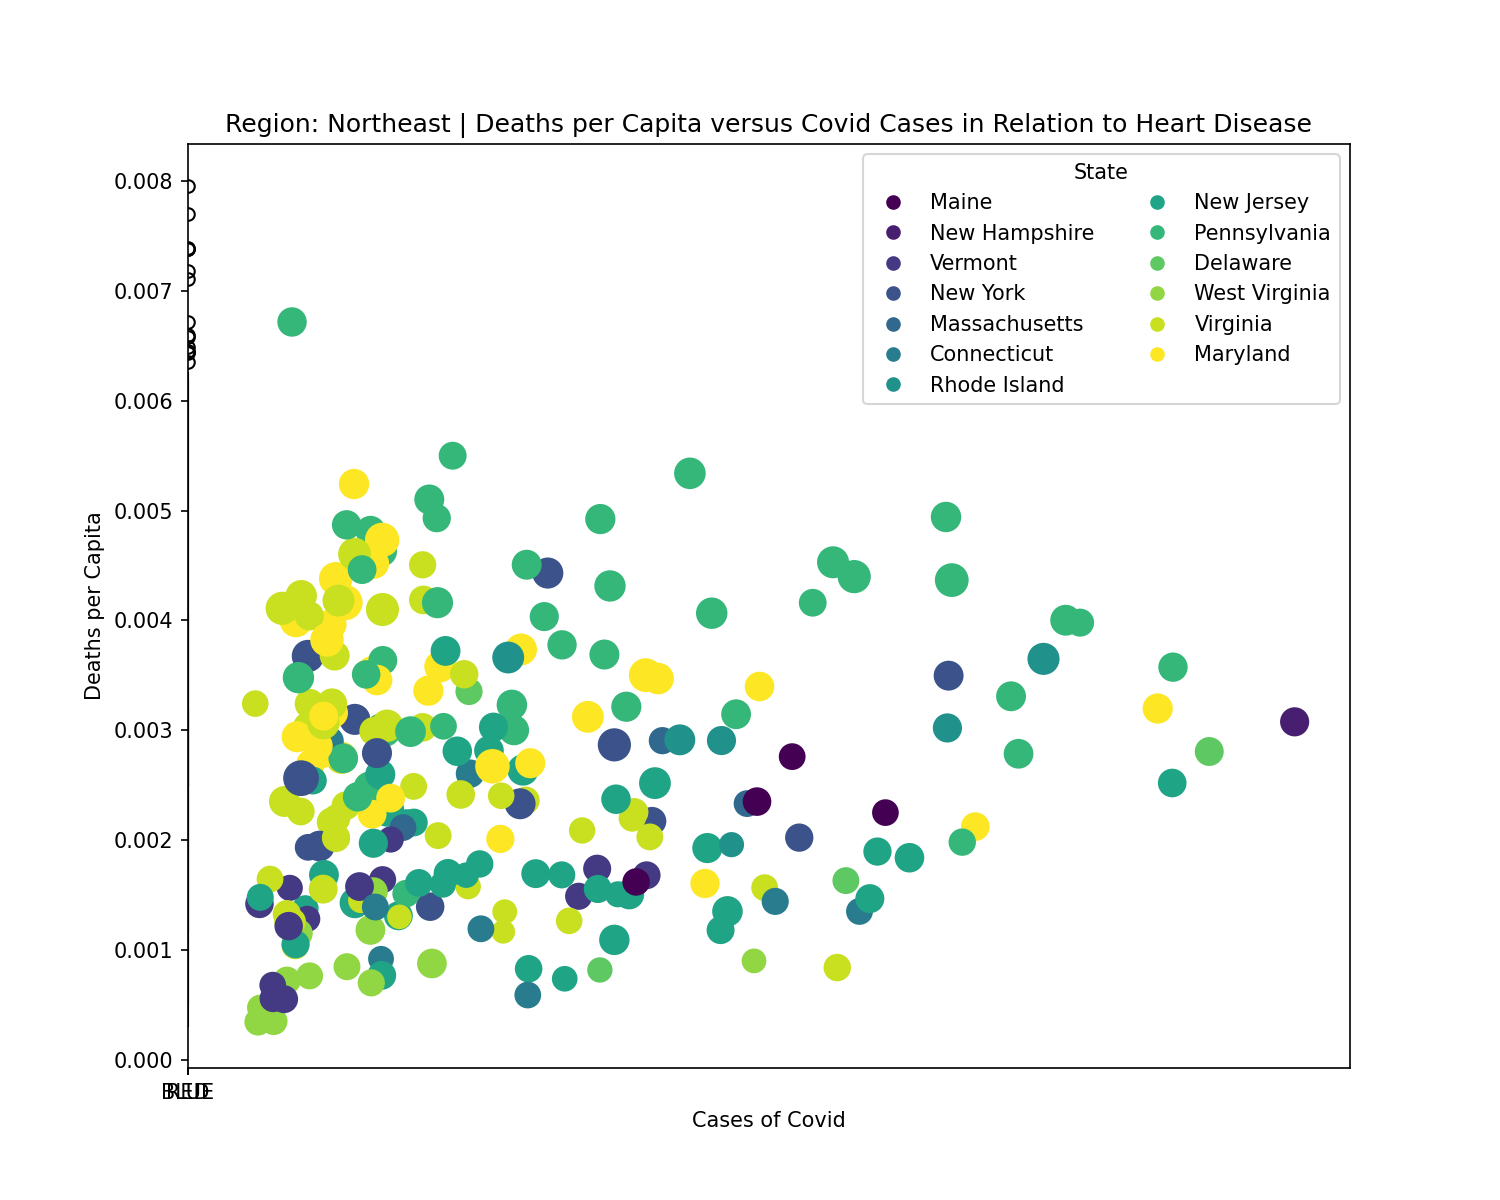

This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.


In [28]:
#Variables
Northeast_co = Northeast_df["County"]
Northeast_pop = Northeast_df["Population"]
Northeast_cases = Northeast_df["Cases"]
Northeast_heart = Northeast_df["Heart Disease"]
Northeast_cap = Northeast_df["Deaths per Capita"]

#Plot Graph
plt.figure(figsize=(10,8))
plt.ylabel("Population")
Scatter = plt.scatter(Northeast_co, Northeast_pop,s=100,
            c=Northeast_df.State.astype('category').cat.codes)
#Hover Event
mplcursors.cursor(Scatter, hover=True)
plt.legend(loc="lower center",bbox_to_anchor=(.50, -0.15), ncol= 4, handles=Scatter.legend_elements()[0], 
           labels=Northeast,
           title="State")
Scatter.axes.get_xaxis().set_visible(False)
plt.title("United States Region: Northeast | County versus Population")

#Plot Graph
plt.figure(figsize=(10,8))
plt.xlabel("Cases of Covid")
plt.ylabel("Deaths per Capita")
Scatter2 = plt.scatter(Northeast_cases, Northeast_cap,s=Northeast_heart*.5,
            c=Northeast_df.State.astype('category').cat.codes)
#Hover Event
mplcursors.cursor(Scatter2, hover=True)
plt.legend(loc="upper right", ncol= 2, handles=Scatter2.legend_elements()[0], 
           labels=Northeast,
           title="State")
plt.title("Region: Northeast | Deaths per Capita versus Covid Cases in Relation to Heart Disease")
print("This graph shows the deaths per capita and covid cases recorded by each county. The marker point sizes vary due to the number of instances of heart disease recorded.")

In [29]:
# Compare political affiliations
reds = merged_df[merged_df['Party'] == 'REPUBLICAN']['Deaths per Capita']
blues = merged_df[merged_df['Party'] == 'DEMOCRAT']['Deaths per Capita']

plt.boxplot([reds, blues], labels=['RED', 'BLUE'])
plt.show()

stats.ttest_ind(reds, blues)

Ttest_indResult(statistic=11.632199864779684, pvalue=5.847206278351935e-30)

In [30]:
#Takes axis and col names, r=True puts r-value in legend, by default it doesn't, xunit/yunit add unit to labels
def makescatter(ax, col1, col2, r=False, xunit='', yunit=''):
    xs = merged_df[col1]
    ys = merged_df[col2]
    (m, b, rvalue, p, q) = stats.linregress(xs, ys)
    regress = [m*x + b for x in xs]
    ax.scatter(xs, ys)
    ax.plot(xs, regress, 'r-', label=round(rvalue**2, 3))
    if xunit:
        col1 += f' ({xunit})'
    if yunit:
        col2 += f' ({yunit})'
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(col1 + ' versus ' + col2)
    if r:
        ax.legend()
    return

<IPython.core.display.Javascript object>


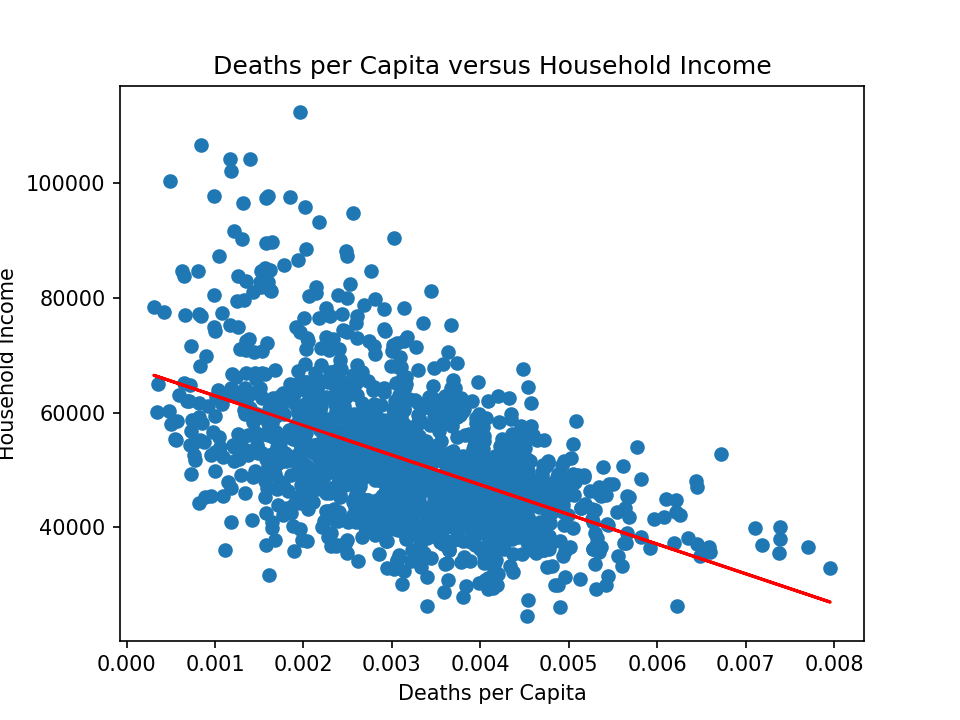

In [31]:
#plotting 1 plot, no extra stuff
fig, ax1 = plt.subplots(1,1)

makescatter(ax1, 'Deaths per Capita', 'Household Income')


<IPython.core.display.Javascript object>


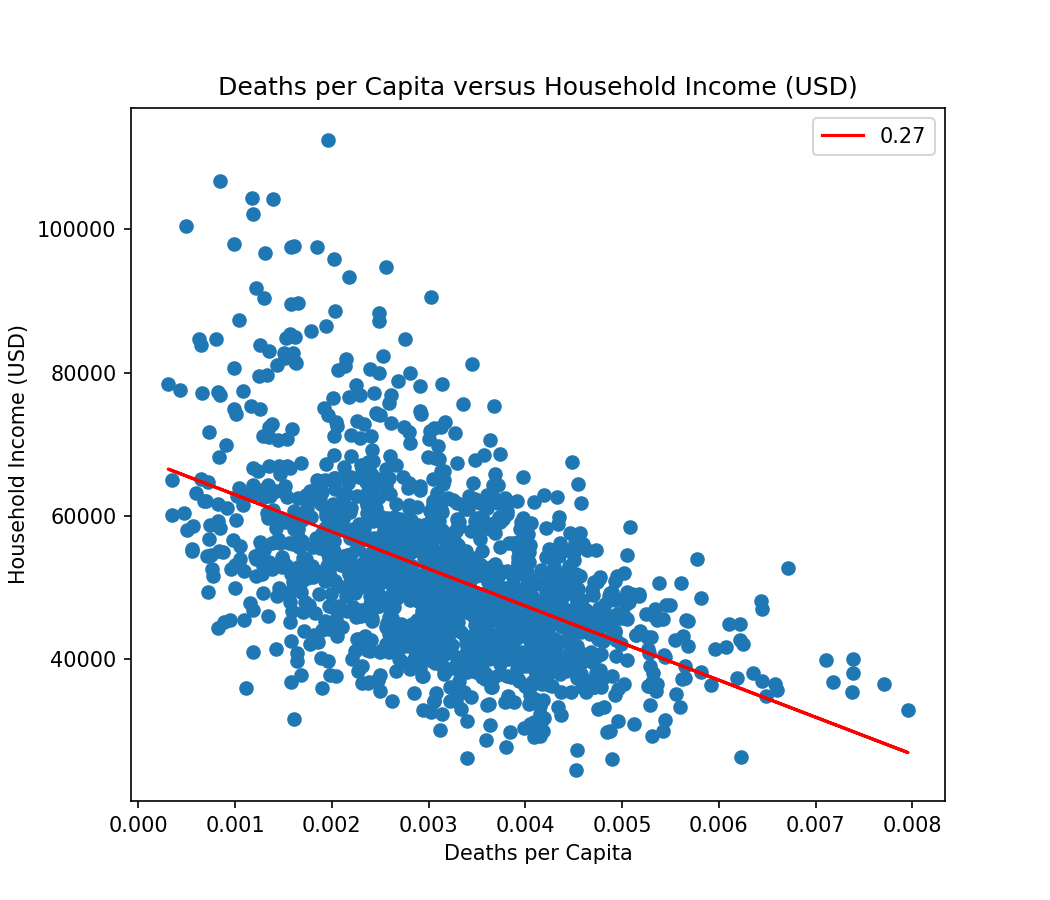

In [32]:
#plotting 1 plot, with rvalue and yunit and figsize corrected
fig, ax1 = plt.subplots(1,1, figsize=(7,6))

makescatter(ax1, 'Deaths per Capita', 'Household Income', r=True, yunit='USD')


<IPython.core.display.Javascript object>


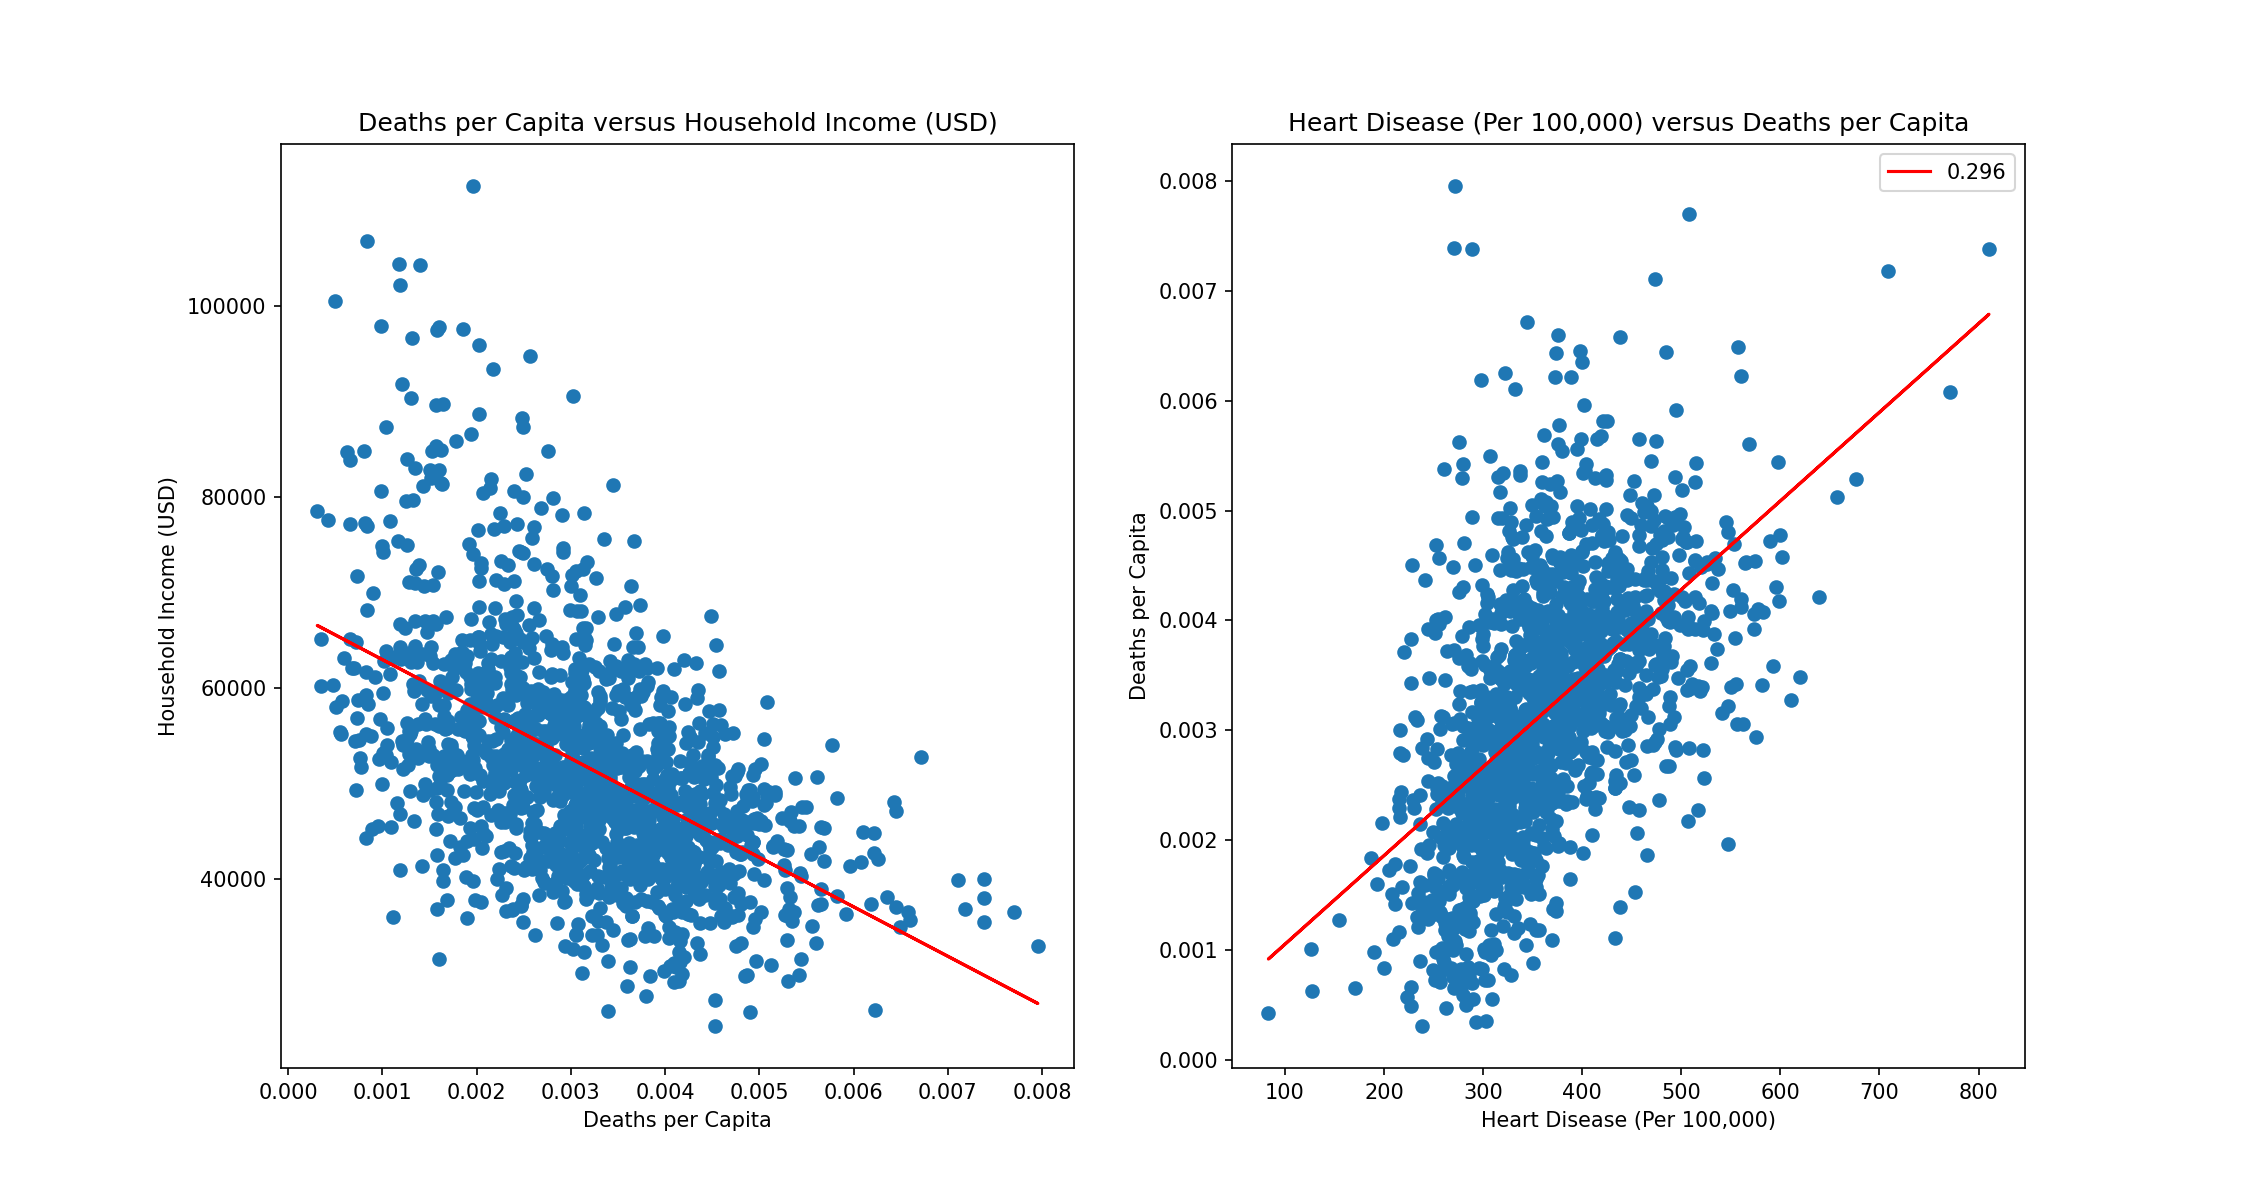

In [33]:
#plotting 2 plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

makescatter(ax1, 'Deaths per Capita', 'Household Income', yunit='USD')

makescatter(ax2, 'Heart Disease', 'Deaths per Capita', xunit='Per 100,000', r=True)


## Boxplots

## Boxplot for Deaths per Capita

In [34]:
#Divide states in 2 by alphabetical order
first_half_states = merged_df[merged_df["State"].str[0] <= "M"] #Select those states whose first letter <= "M"
second_half_states= merged_df[merged_df["State"].str[0] > "M"] #Select those states whose first letter > "M"

In [35]:
def create_vertical_box_plot(figsize,title,df1,df2,column,by,ylabel_1,ylabel_2):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
    
    df1.boxplot(ax = ax1,column = column, by=by, rot = 90); #figsize=(20,10)
    ax1.set_title(ylabel_1, fontsize = 12);

    df2.boxplot(ax = ax2,column =column, by=by, rot = 90);
    ax2.set_title(ylabel_2, fontsize = 12);
    
    fig.tight_layout(pad = 3) #separation between boxplots
    fig.suptitle(title, fontsize = 20, fontweight = "bold")
    return

<IPython.core.display.Javascript object>


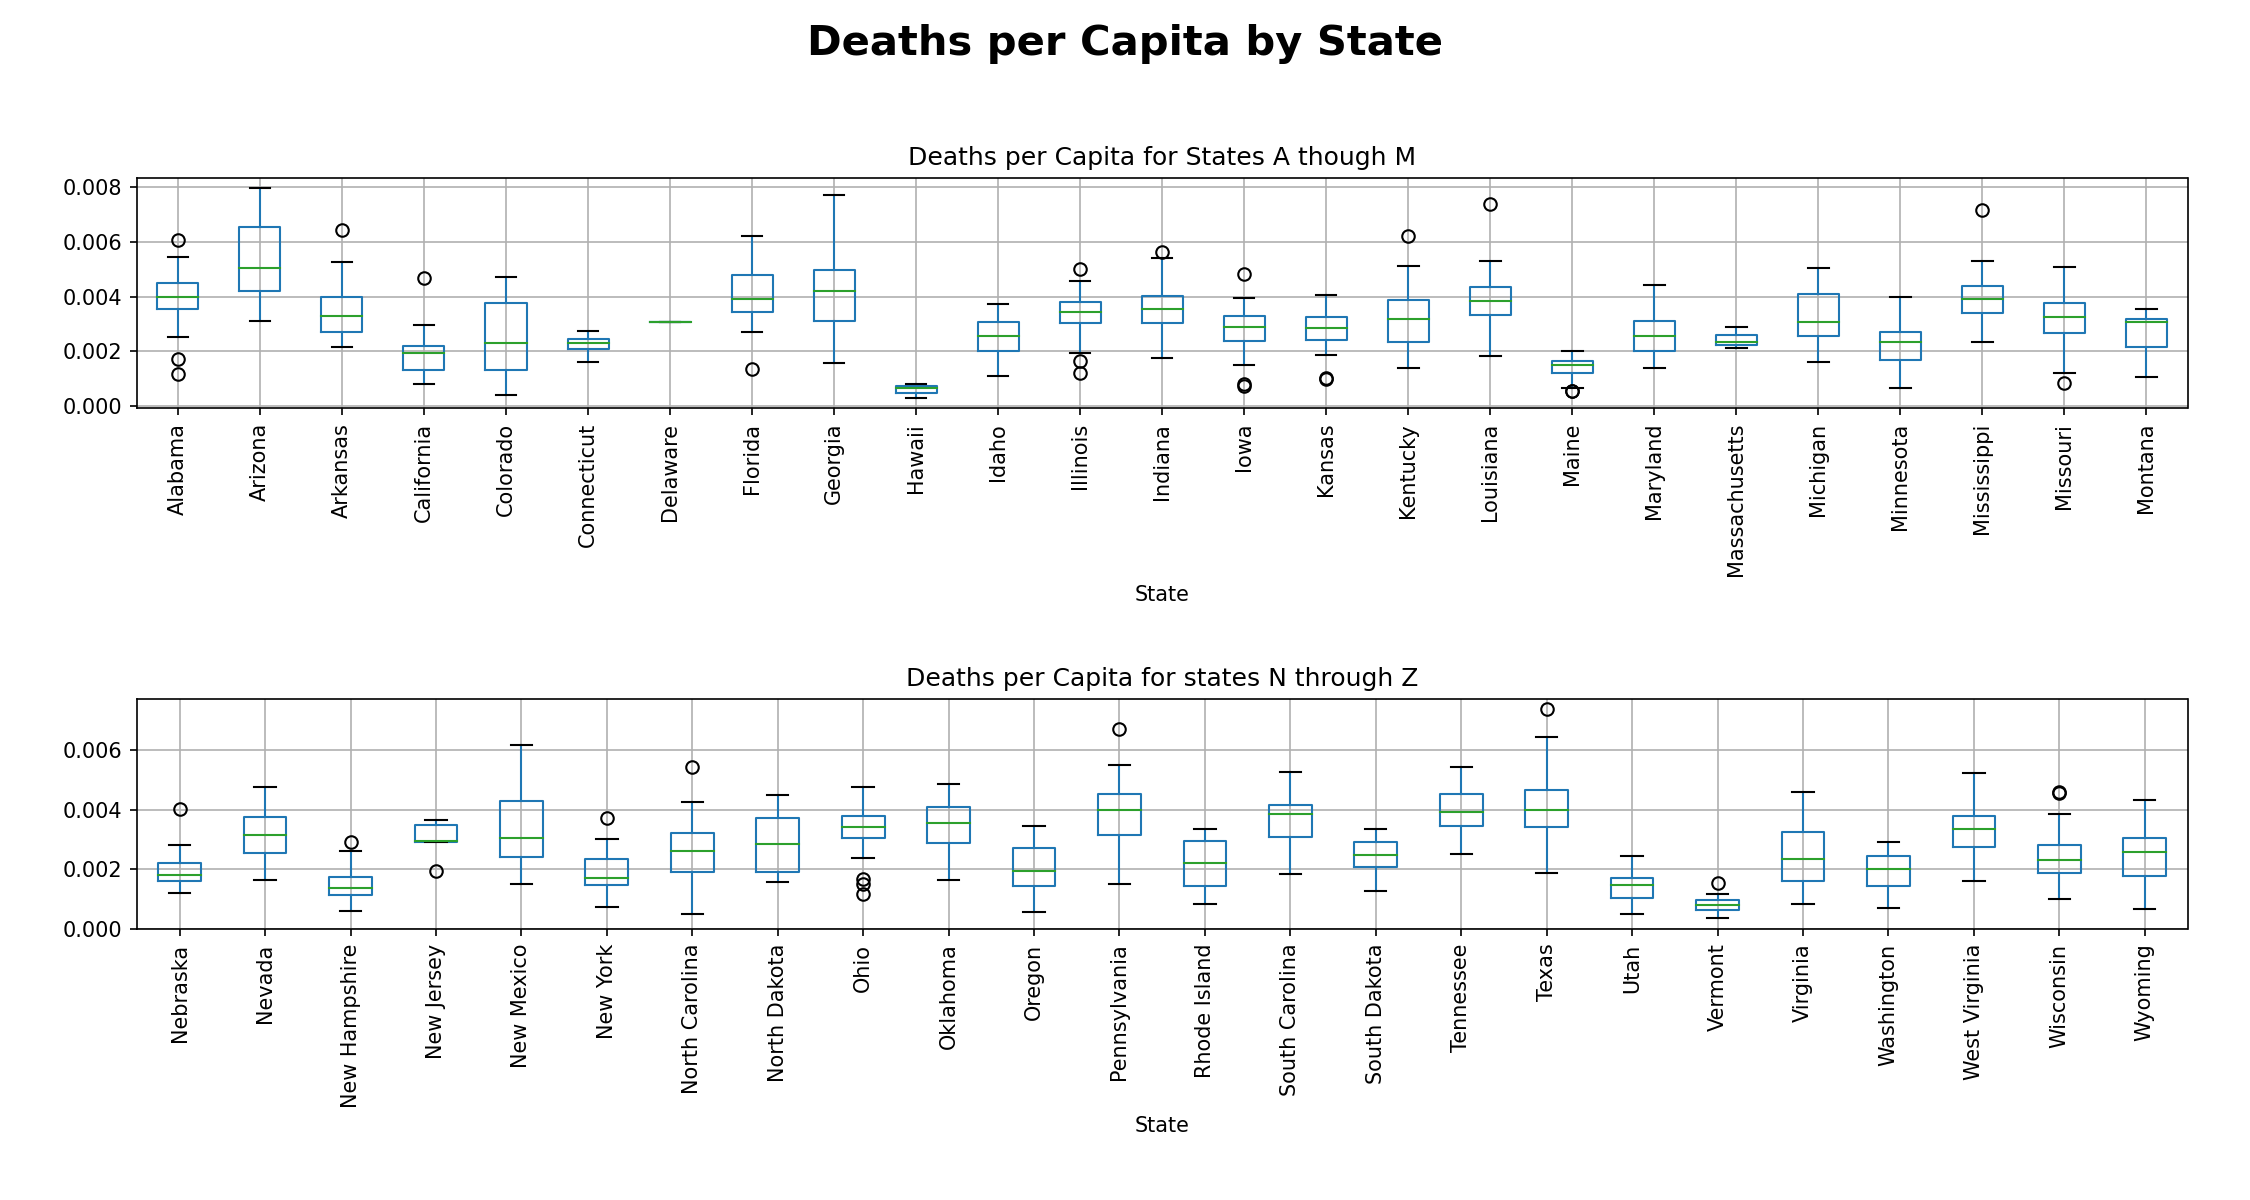

In [36]:
#Create box plot deaths per capita calling function above
create_vertical_box_plot((20,10),"Deaths per Capita by State",first_half_states, second_half_states, "Deaths per Capita","State", "Deaths per Capita for States A though M", "Deaths per Capita for states N through Z")

## Box plot for Cases by Capita

<IPython.core.display.Javascript object>


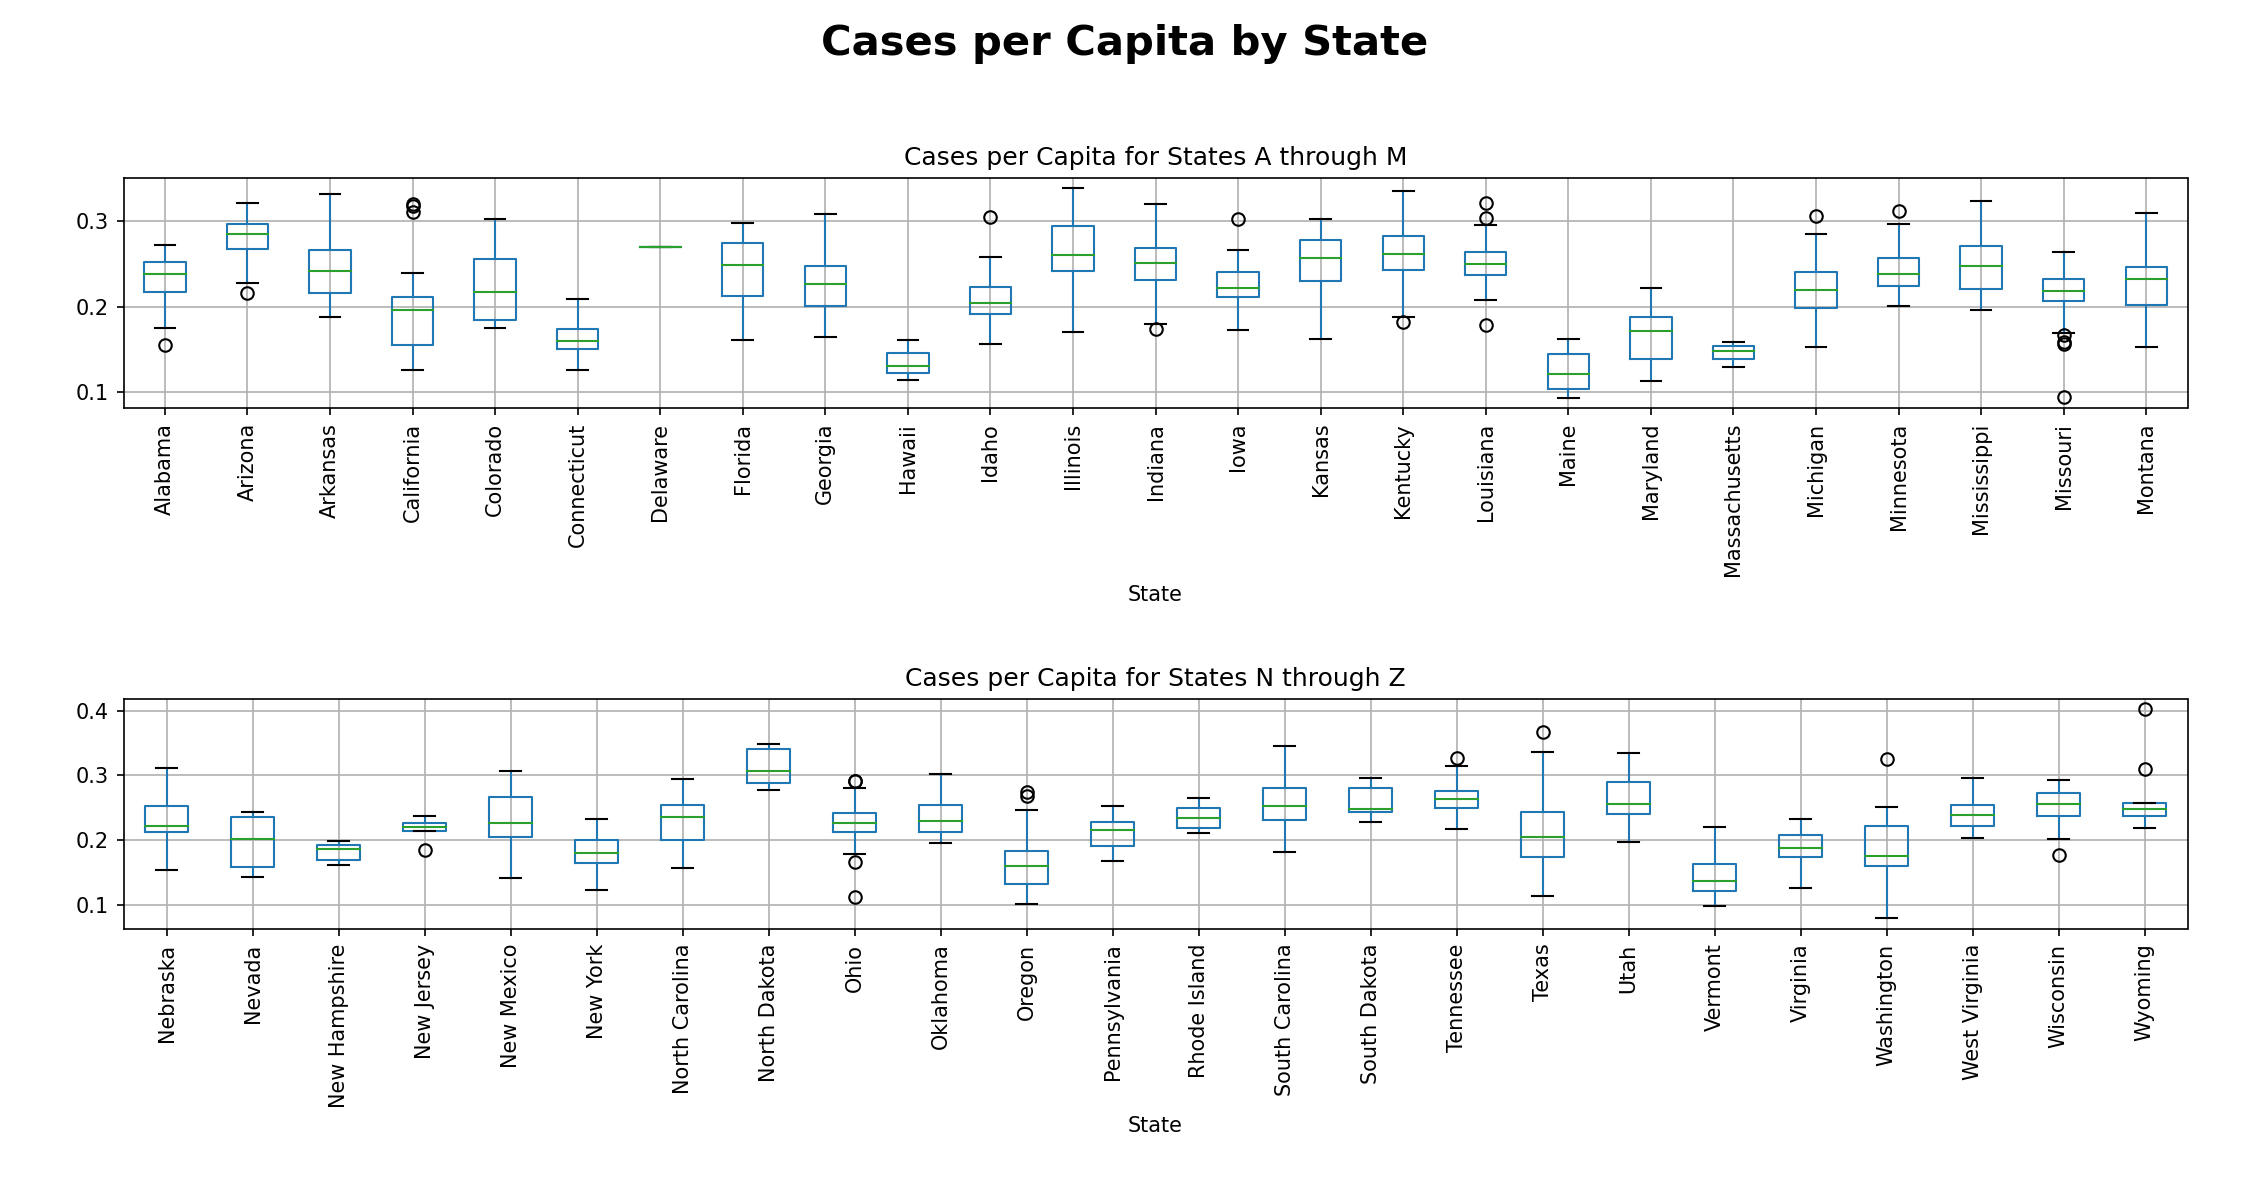

In [37]:
create_vertical_box_plot((20,10),"Cases per Capita by State",first_half_states,second_half_states,"Cases per Capita","State","Cases per Capita for States A through M","Cases per Capita for States N through Z");

## Heat Maps

In [38]:
#import dependencies
import requests
import gmaps
import os

# Import API key
from api_keys import g_key
gmaps.configure(api_key = g_key)

In [39]:
#Select those states with Highest number of Cases per Capita
#Sort Descending by Cases per Capita
sorted_df_by_cases = merged_df.sort_values(by=["Cases per Capita"], ascending=False,ignore_index = True).head(5)

#create locations for heatmap
locations_sorted_df_by_cases = sorted_df_by_cases[["Y_Latitude", "X_Longitude"]]

#shocase the df
sorted_df_by_cases

Cases  Deaths  Vaccination Rate  Population  Median Age  Household Income  \
0   9272    15.0              90.3     23059.0        39.3           83831.0   
1   9907   121.0              53.1     27009.0        33.9           41752.0   
2  10745    80.0              35.7     30876.0        33.9           75708.0   
3  42484   535.0              45.5    122746.0        36.2           47024.0   
4  32210   290.0              49.8     93737.0        36.9           69719.0   

   Heart Disease  Y_Latitude  X_Longitude  Stroke       Party    County  \
0          170.5   43.926156  -110.594230    48.2    DEMOCRAT     Teton   
1          335.4   29.359158   -99.765318    82.6  REPUBLICAN    Uvalde   
2          272.5   46.811922  -102.657523    52.9  REPUBLICAN     Stark   
3          397.3   34.883031   -82.723822    76.0  REPUBLICAN   Pickens   
4          233.1   46.978215  -100.471199    72.9  REPUBLICAN  Burleigh   

            State  Cases per Capita  Deaths per Capita  
0         Wyoming          0.402099           0.000651  
1           Texas          0.366804           0.004480  
2    North Dakota          0.348005           0.002591  
3  South Carolina          0.346113           0.004359  
4    North Dakota          0.343621           0.003094

In [40]:
#Select those states with Highest number of Deaths per Capita
#Sort Descending by Cases per Capita
sorted_df_by_deaths = merged_df.sort_values(by=["Deaths per Capita"], ascending=False, ignore_index = True).head(5)

#create locations and info for box templaye for heatmap
locations_sorted_df_by_deaths = sorted_df_by_deaths[["Y_Latitude", "X_Longitude"]]


#shocase the df
sorted_df_by_deaths

Cases  Deaths  Vaccination Rate  Population  Median Age  Household Income  \
0  20058   569.0              93.6     71522.0        34.7           32963.0   
1   7343   202.0              44.5     26216.0        41.7           36529.0   
2  34605   803.0              72.0    108705.0        36.4           40054.0   
3  19171   428.0              86.0     57970.0        29.6           38035.0   
4   6529   150.0              36.0     20322.0        38.5           35466.0   

   Heart Disease  Y_Latitude  X_Longitude  Stroke       Party    County  \
0          271.2   35.394866  -109.486870    72.2    DEMOCRAT    Apache   
1          507.9   32.877728   -84.298849   160.9  REPUBLICAN     Upson   
2          270.5   35.401640  -110.314143    73.6  REPUBLICAN    Navajo   
3          289.0   28.741022  -100.315799    73.5    DEMOCRAT  Maverick   
4          810.5   32.140156   -91.669639    65.7  REPUBLICAN  Franklin   

       State  Cases per Capita  Deaths per Capita  
0    Arizona          0.280445           0.007956  
1    Georgia          0.280096           0.007705  
2    Arizona          0.318339           0.007387  
3      Texas          0.330706           0.007383  
4  Louisiana          0.321277           0.007381

In [41]:
# Using the template add the County/State to the heatmap
info_box_template_cases_per_capita = """
<dl>
<dt>County</dt><dd>{County}</dd>
<dt>State</dt><dd>{State}</dd>
<dt>Cases per Capita</dt><dd>{Cases per Capita}</dd>
</dl>
"""

box_template_cases = [info_box_template_cases_per_capita.format(**row) for index, row in sorted_df_by_cases.iterrows()]

In [42]:
# Using the template add the County/State to the heatmap
info_box_template_deaths_per_capita = """
<dl>
<dt>County</dt><dd>{County}</dd>
<dt>State</dt><dd>{State}</dd>
<dt>Deaths per Capita</dt><dd>{Deaths per Capita}</dd>
</dl>
"""

box_template_deaths = [info_box_template_deaths_per_capita.format(**row) for index, row in sorted_df_by_deaths.iterrows()]

In [43]:
def create_map(weights, max_intensity, locations_for_marker_layer, info_box_for_marker_layer, locations_for_symbol_layer, info_box_for_symbol_layer):
    figure = gmaps.figure()
    locations = merged_df[["Y_Latitude", "X_Longitude"]]
    heat_layer = gmaps.heatmap_layer(locations, weights = weights, dissipating = False, max_intensity = max_intensity,point_radius = 0.3)
    figure.add_layer(heat_layer)
    # Add marker layer ontop of heat map
    markers = gmaps.marker_layer(locations_sorted_df_by_cases, info_box_content = info_box_for_marker_layer)
    figure.add_layer(markers)
    symbol_layer = gmaps.symbol_layer(locations_for_symbol_layer, info_box_content=info_box_for_symbol_layer)
    figure.add_layer(symbol_layer)

    return figure

In [44]:
figure1 = create_map(merged_df["Heart Disease"], 600, locations_sorted_df_by_cases, box_template_cases,locations_sorted_df_by_deaths,box_template_deaths)
figure1

Figure(layout=FigureLayout(height='420px'))

In [45]:
figure2 = create_map(merged_df["Stroke"], 0.1, locations_sorted_df_by_cases, info_box_template_cases_per_capita,locations_sorted_df_by_deaths,info_box_template_deaths_per_capita)
figure2

Figure(layout=FigureLayout(height='420px'))

# COVID Cases Per Day

In [46]:
covid_df = pd.read_csv('resources/covid-statistics.csv')
covid_df.head(5)

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0

In [47]:
covid_df["date"] = pd.to_datetime(covid_df["date"])

<IPython.core.display.Javascript object>


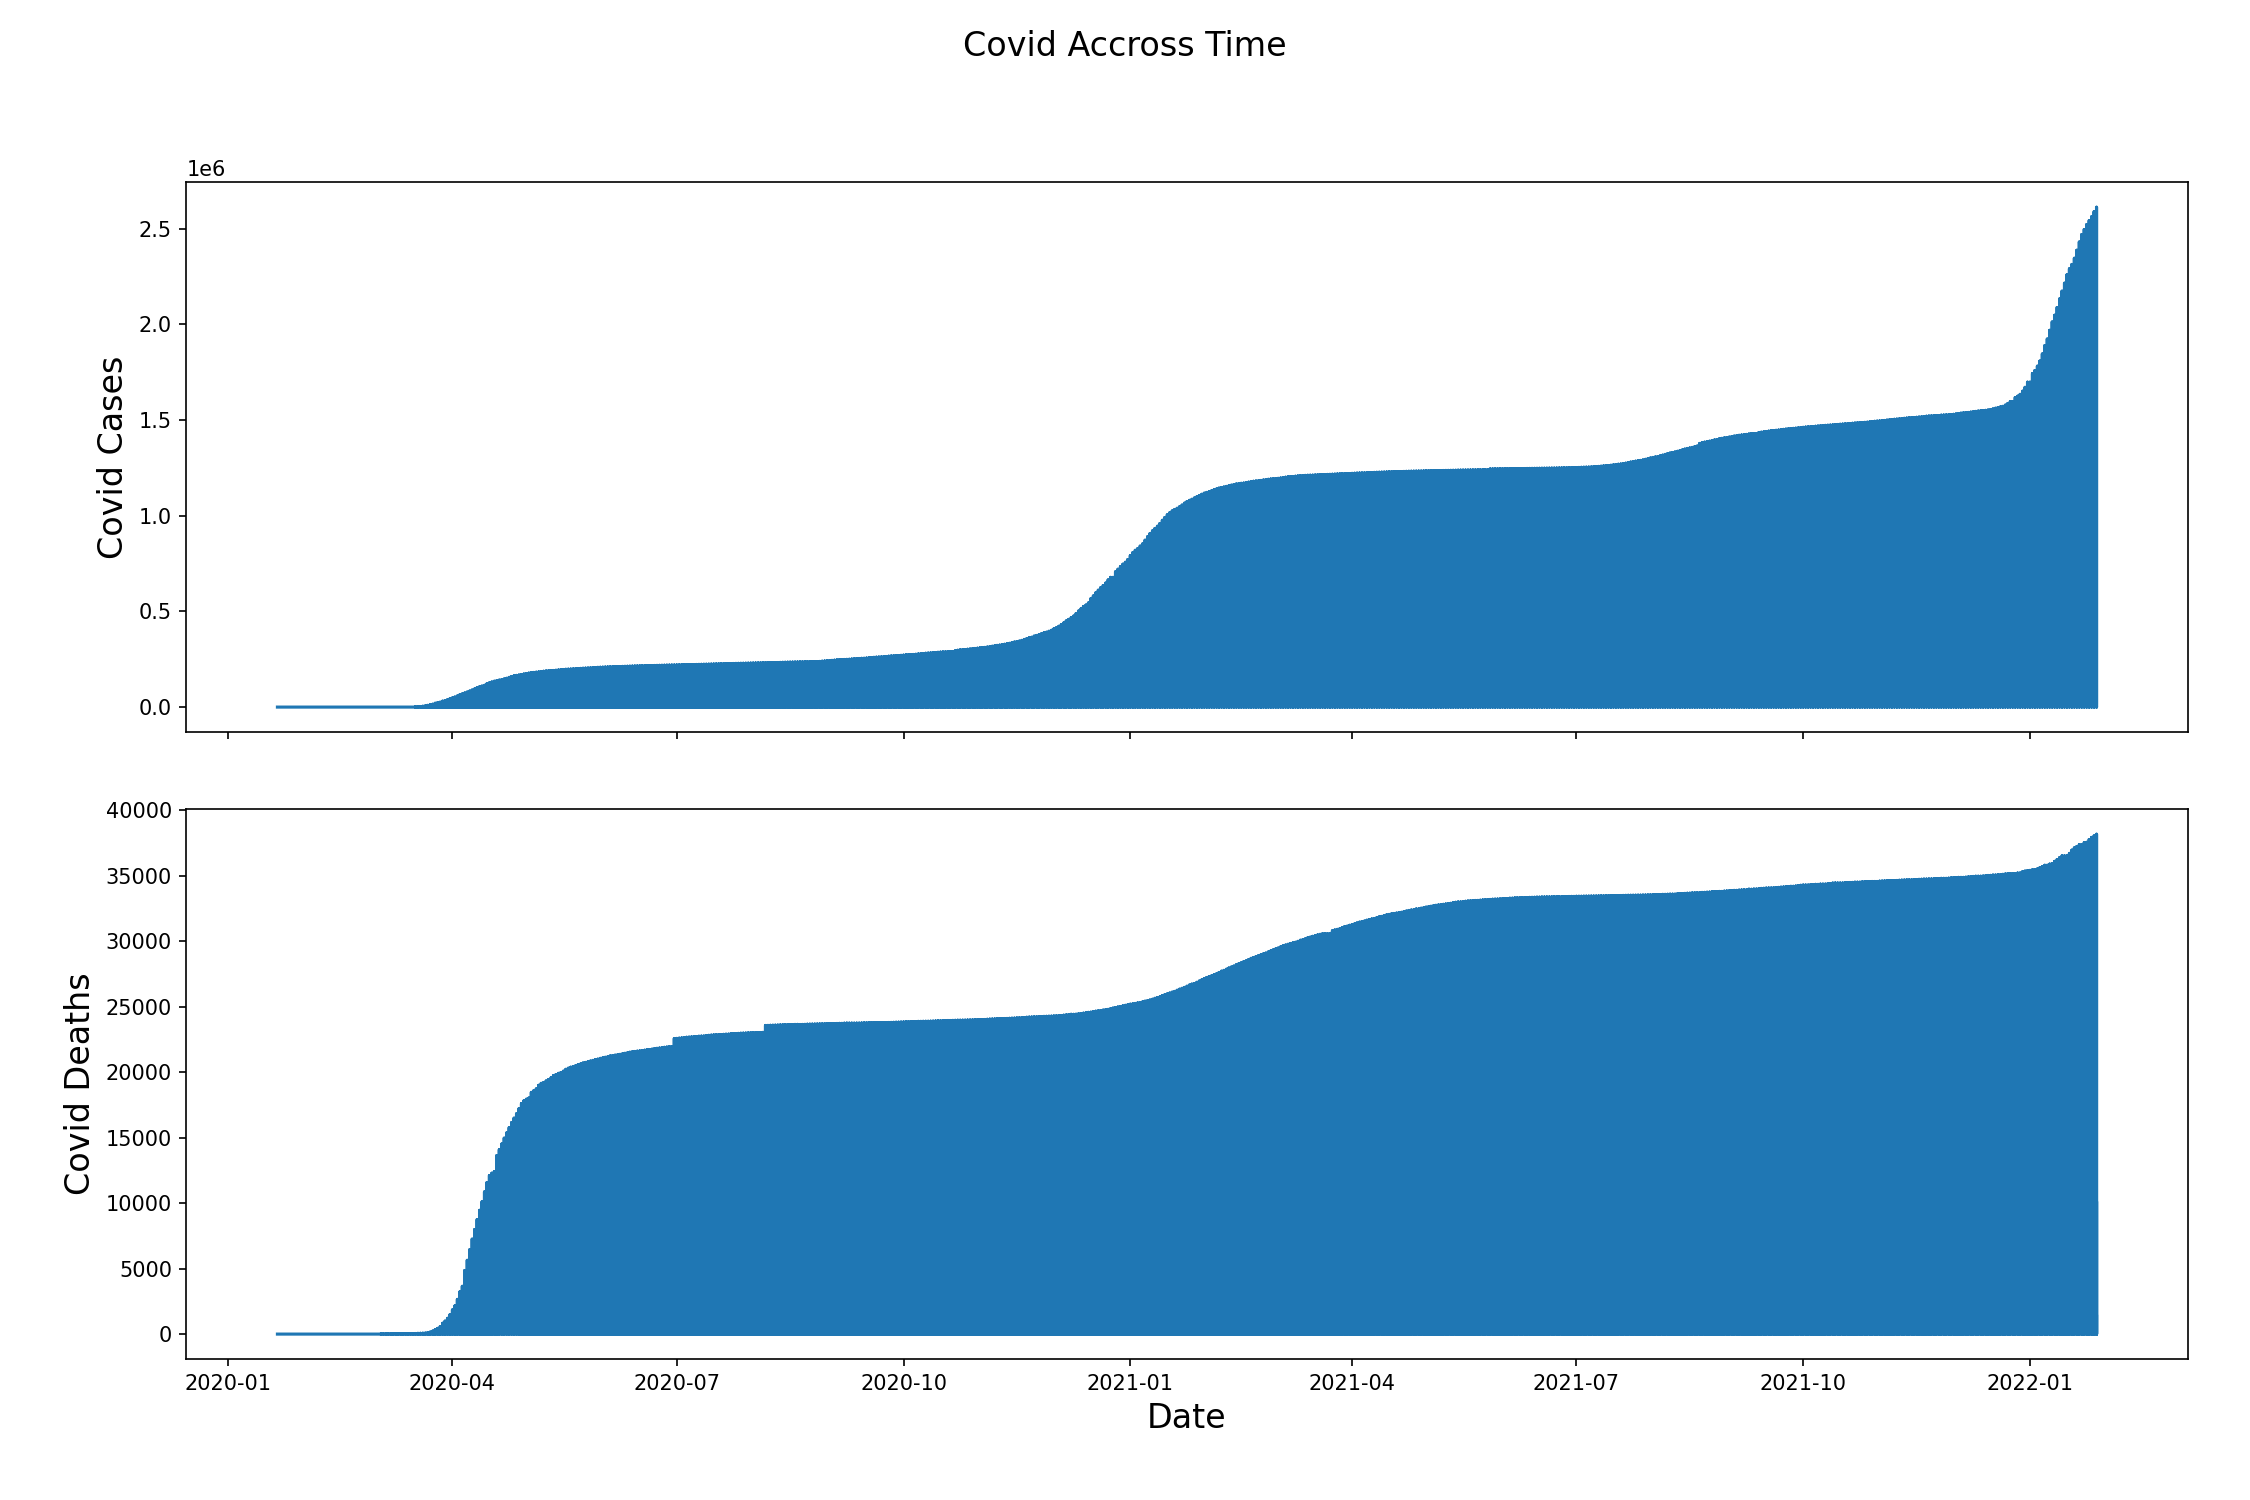

In [48]:
date = covid_df["date"]
covid_cases = covid_df["cases"]
covid_deaths = covid_df["deaths"]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex = True) #removed sharey = True

ax1.plot(date, covid_cases)
ax1.set_ylabel("Covid Cases", fontsize = 16)

ax2.plot(date, covid_deaths);
ax2.set_ylabel("Covid Deaths", fontsize = 16)
ax2.set_xlabel("Date", fontsize = 16)

fig.suptitle('Covid Accross Time', fontsize=16)
fig.tight_layout(pad = 3) #separation between boxplots